In [1]:
### ValDXer testing
import os
os.environ['HDXER_PATH'] = '/home/alexi/Documents/HDXer'


In [2]:

from ValDX.ValidationDX import ValDXer
from ValDX.VDX_Settings import Settings
import pandas as pd
import MDAnalysis as mda
from MDAnalysis.coordinates.DCD import DCDWriter  # Import DCDWriter directly
from MDAnalysis.coordinates.XTC import XTCWriter


settings = Settings(name='test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange')
settings.replicates = 2
settings.gamma_range = (1,6)
settings.train_frac = 0.5
settings.RW_exponent = [0]
settings.stride = 100000 
settings.HDXer_stride = 1
settings.RW_do_reweighting = False
settings.RW_do_params = False
import pickle

expt_name = 'Experimental'
test_name = "MD_Simulated"


/home/alexi/Documents/ValDX


In [3]:
import os
print(os.getenv('HDXER_PATH'))


/home/alexi/Documents/HDXer


In [4]:
print(os.environ["HDXER_PATH"])
print(__name__)

/home/alexi/Documents/HDXer
__main__


In [5]:
# BPTI data

def preprocess_main_MD():
    pdb_path = "/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein.pdb"

    with open(pdb_path, 'r') as f:
        pdb = f.readlines()
        newlines = []
        for line in pdb:
            if line.startswith('ATOM'):
                # replace index 26 with " "
                line = line[:26] + " " + line[27:]

            newlines.append(line)

    with open('bpti-protein.pdb', 'w') as f:
        f.writelines(newlines)

    BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI"
    BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI"

    expt_dir = os.path.join(BPTI_dir, "BPTI_expt_data")

    os.listdir(expt_dir)

    segs_name = "BPTI_residue_segs.txt"
    segs_path = os.path.join(expt_dir, segs_name)

    hdx_name = "BPTI_expt_dfracs.dat"
    hdx_path = os.path.join(expt_dir, hdx_name)
    print(hdx_path)

    rates_name = "BPTI_Intrinsic_rates.dat"
    rates_path = os.path.join(expt_dir, rates_name)

    SHAW_dir = "/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein"

    dir_list = os.listdir(SHAW_dir)

    dcd_list = [i for i in dir_list if i.endswith(".dcd")]
    # remove any with small in name
    dcd_list = [i for i in dcd_list if not "_str" in i]

    dcd_list.sort()
    print(dcd_list)
    print(len(dcd_list))

    sim_name = "BPTI_SHAW"
    top_name = "bpti-protein_noalt.pdb"
    top_path = "/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/APO_amber99_5PTI_1-nojump.pdb"
    reps = len(dcd_list)
    # reps =100

    traj_paths = ["/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/APO_amber99_5PTI_1-nojump.xtc"]

    u = mda.Universe(top_path, traj_paths[0])

    small_traj_name = traj_paths[0].replace(".xtc", "_xtal.xtc")

    with XTCWriter(small_traj_name, n_atoms=u.atoms.n_atoms) as W:
        for ts in u.trajectory[::settings.stride]:
            W.write(u.atoms)
            W.write(u.atoms)
            break




        
    small_traj_paths = [small_traj_name]

    return hdx_path, segs_path, rates_path, top_path, small_traj_paths, reps, sim_name, expt_name, test_name

In [6]:
import pandas as pd

In [7]:
# file_name = "covid_submissions_all_info.csv"

In [8]:
# sub_test = pd.read_csv(file_name)

In [9]:
# sub_test.columns.to_list()

In [10]:
def run_split_test(split_mode, name, system):

    # settings.split_mode = 'R'
    settings.split_mode = split_mode
    settings.name = "_".join([name, split_mode])

    VDX = ValDXer(settings)

    VDX.load_HDX_data(HDX_path=hdx_path, SEG_path=segs_path, calc_name=expt_name)
    VDX.load_intrinsic_rates(path=rates_path, calc_name=expt_name)

    VDX.load_structures(top_path=top_path, traj_paths=small_traj_paths, calc_name=test_name)

    run_outputs = VDX.run_VDX(calc_name=test_name, expt_name=expt_name)
    analysis_dump, df, name = VDX.dump_analysis()
    save_path = VDX.save_experiment()

    return run_outputs, analysis_dump, df, name, save_path

In [11]:

hdx_path, segs_path, rates_path, top_path, small_traj_paths, reps, sim_name, expt_name, test_name = preprocess_main_MD()


/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_expt_data/BPTI_expt_dfracs.dat
['bpti-protein-000.dcd', 'bpti-protein-001.dcd', 'bpti-protein-002.dcd', 'bpti-protein-003.dcd', 'bpti-protein-004.dcd', 'bpti-protein-005.dcd', 'bpti-protein-006.dcd', 'bpti-protein-007.dcd', 'bpti-protein-008.dcd', 'bpti-protein-009.dcd', 'bpti-protein-010.dcd', 'bpti-protein-011.dcd', 'bpti-protein-012.dcd', 'bpti-protein-013.dcd', 'bpti-protein-014.dcd', 'bpti-protein-015.dcd', 'bpti-protein-016.dcd', 'bpti-protein-017.dcd', 'bpti-protein-018.dcd', 'bpti-protein-019.dcd', 'bpti-protein-020.dcd', 'bpti-protein-021.dcd', 'bpti-protein-022.dcd', 'bpti-protein-023.dcd', 'bpti-protein-024.dcd', 'bpti-protein-025.dcd', 'bpti-protein-026.dcd', 'bpti-protein-027.dcd', 'bpti-protein-028.dcd', 'bpti-protein-029.dcd', 'bpti-protein-030.dcd', 'bpti-protein-031.dcd', 'bpti-protein-032.dcd', 'bpti-protein-033.dcd', 'bpti-protein-034.dcd', 'bpti-protein-035.dcd', 'bpti-protein-036.dcd', 'bpti-protein-037.

Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
Experiment name random_R3 already exists. Attempting to change name to random_R30
Experiment name random_R3 already exists. Attempting to change name to random_R31
Experiment name random_R3 already exists. Attempting to change name to random_R32
Experiment name random_R3 already exists. Attempting to change name to random_R33
Experiment name random_R3 already exists. Attempting to change name to random_R34
Experiment name random_R3 already exists. Attempting to change name to random_R35
Experiment name random_R3 already exists. Attempting to change name to random_R36
Experiment name random_R3 already exists. Attempting to change name to random_R37
Experiment name random_R3 already exists. Attempting to change name to random_R38
Experiment name random_R3 already exists. Attempting to change name to random_R39
Experiment name random_R3 already exists. Attempting to change name to random_R310
Experiment name random_R3 

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/MDAnalysis/coordinates/XDR.py:240: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:329: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_segs["calc_name"] = train_rep_name
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:330: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_segs["calc_name"] = v

Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
python /home/alexi/Documents/HDXer/HDXer/calc_hdx.py -t /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/APO_amber99_5PTI_1-nojump_xtal.xtc -p /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/APO_amber99_5PTI_1-nojump.pdb -m BestVendruscolo -log /home/alexi/Documents/ValDX/data/random_R316/train_MD_Simulated_1/calc_hdx_train_MD_Simulated_1.log -out /home/alexi/Documents/ValDX/data/random_R316/train_MD_Simulated_1/out__train_MD_Simulated_1 -seg /home/alexi/Documents/ValDX/data/random_R316/train_MD_Simulated_1/train_residue_segs__MD_Simulated_.txt -mopt "{ 'save_detailed' : True }" --times 0.167 1.0 10.0 120.0 -str 1
Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
Residue predictions complete


/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/

Path /home/alexi/Documents/ValDX/data/random_R316/train_MD_Simulated_1/out__train_MD_Simulated_1Segment_average_fractions.dat
AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 1
/home/alexi/Documents/ValDX/data/random_R316/train_MD_Simulated_1/train_MD_Simulated_1_expt_dfracs.dat
/home/alexi/Documents/ValDX/data/random_R316/train_MD_Simulated_1
/home/alexi/Documents/ValDX/data/random_R316/train_MD_Simulated_1/out__train_MD_Simulated_1Intrinsic_rates.dat
REWIGHTING train_MD_Simulated_1 with Exponent: 0
[{'do_reweight': False, 'do_params': False, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/home/alexi/Documents/ValDX/data/random_R316/train_MD_Simulated_1'], 'kint_file': '/home/alexi/Documents/ValDX/data/random_R316/train_MD_Simulated_1/out__train_MD_Simulated_1Intrinsic_rates.dat', 'exp_file': '/home/alexi/Documents/ValDX/data/random_R316/train_MD_Simulated_1/train_MD_Simulated_1_expt_dfracs.dat', 'times': array([  0.167,   1.   ,  10.   , 120.   ]), 'restart_inte

/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:329: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_segs["calc_name"] = train_rep_name
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:330: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_segs["calc_name"] = val_rep_name
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
python /home/alexi/Documents/HDXer/HDXer/calc_hdx.py -t /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/APO_amber99_5PTI_1-nojump_xtal.xtc -p /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/APO_amber99_5PTI_1-nojump.pdb -m BestVendruscolo -log /home/alexi/Documents/ValDX/data/random_R316/train_MD_Simulated_2/calc_hdx_train_MD_Simulated_2.log -out /home/alexi/Documents/ValDX/data/random_R316/train_MD_Simulated_2/out__train_MD_Simulated_2 -seg /home/alexi/Documents/ValDX/data/random_R316/train_MD_Simulated_2/train_residue_segs__MD_Simulated_.txt -mopt "{ 'save_detailed' : True }" --times 0.167 1.0 10.0 120.0 -str 1
Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
Residue predictions complete


/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/

Path /home/alexi/Documents/ValDX/data/random_R316/train_MD_Simulated_2/out__train_MD_Simulated_2Segment_average_fractions.dat
AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 2
/home/alexi/Documents/ValDX/data/random_R316/train_MD_Simulated_2/train_MD_Simulated_2_expt_dfracs.dat
/home/alexi/Documents/ValDX/data/random_R316/train_MD_Simulated_2
/home/alexi/Documents/ValDX/data/random_R316/train_MD_Simulated_2/out__train_MD_Simulated_2Intrinsic_rates.dat
REWIGHTING train_MD_Simulated_2 with Exponent: 0
[{'do_reweight': False, 'do_params': False, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/home/alexi/Documents/ValDX/data/random_R316/train_MD_Simulated_2'], 'kint_file': '/home/alexi/Documents/ValDX/data/random_R316/train_MD_Simulated_2/out__train_MD_Simulated_2Intrinsic_rates.dat', 'exp_file': '/home/alexi/Documents/ValDX/data/random_R316/train_MD_Simulated_2/train_MD_Simulated_2_expt_dfracs.dat', 'times': array([  0.167,   1.   ,  10.   , 120.   ]), 'restart_inte

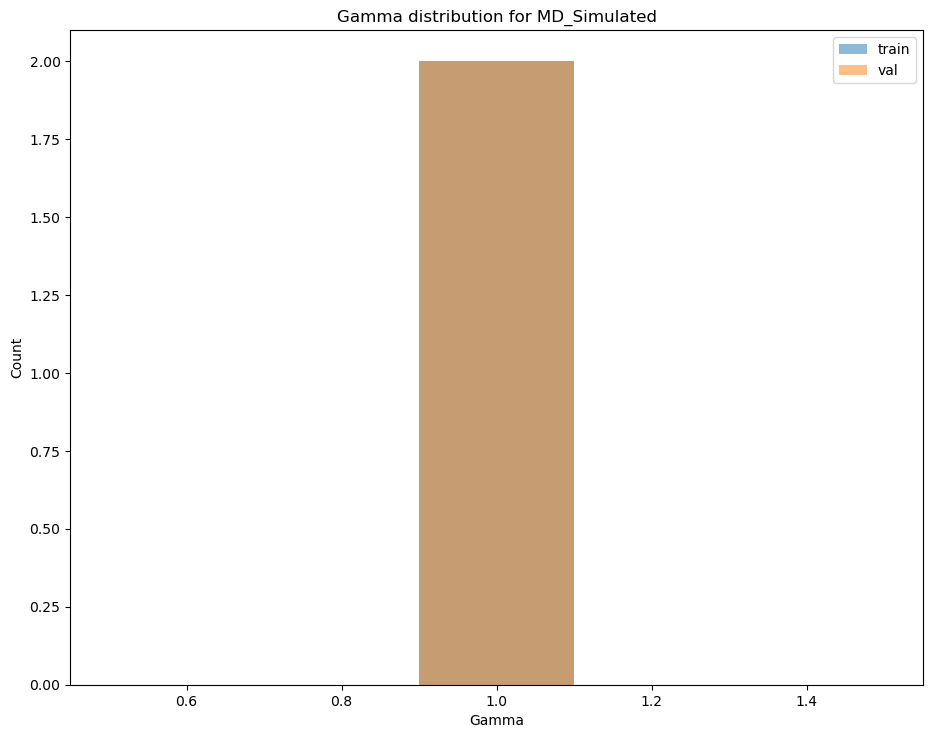

['train_MD_Simulated_1', 'train_MD_Simulated_2']
['val_MD_Simulated_1', 'val_MD_Simulated_2']
plot_dfracs_compare
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
194  0.008357  0.048621  0.365367  0.948120       36  test_MD_Simulated_2   
195  0.056148  0.259086  0.585551  0.948147       37  test_MD_Simulated_2   
196  0.104595  0.483750  0.998599  1.000000       38  test_MD_Simulated_2   
197  0.051581  0.243287  0.584419  0.947057       39  test_MD_Simulated_2   
198  0.001931  0.011488  0.107076  0.65

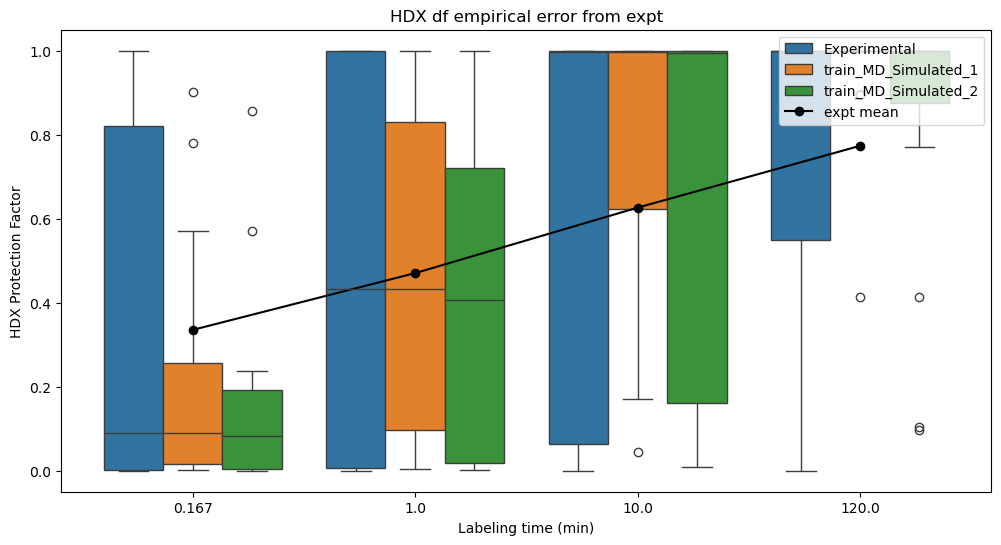

plot_dfracs_compare
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
194  0.008357  0.048621  0.365367  0.948120       36  test_MD_Simulated_2   
195  0.056148  0.259086  0.585551  0.948147       37  test_MD_Simulated_2   
196  0.104595  0.483750  0.998599  1.000000       38  test_MD_Simulated_2   
197  0.051581  0.243287  0.584419  0.947057       39  test_MD_Simulated_2   
198  0.001931  0.011488  0.107076  0.653837       40  test_MD_Simulated_2   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1

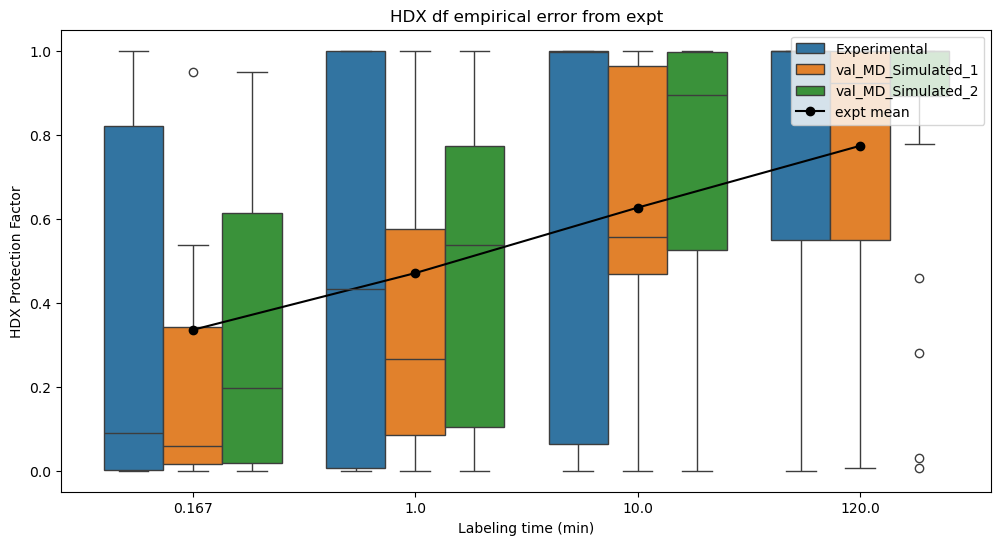

Restoring trainval peptide numbers
train_rep_names ['train_MD_Simulated_1', 'train_MD_Simulated_2']
val_rep_names ['val_MD_Simulated_1', 'val_MD_Simulated_2']
test_rep_names ['test_MD_Simulated_1', 'test_MD_Simulated_2']
train_rep_peptides [0, 1, 2, 3, 4, 5, 33, 34, 35, 36, 37, 38, 39, 40]
val_rep_peptides [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
train_rep_peptides [22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
val_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
manual merge df
       0.167       1.0      10.0     120.0  peptide    

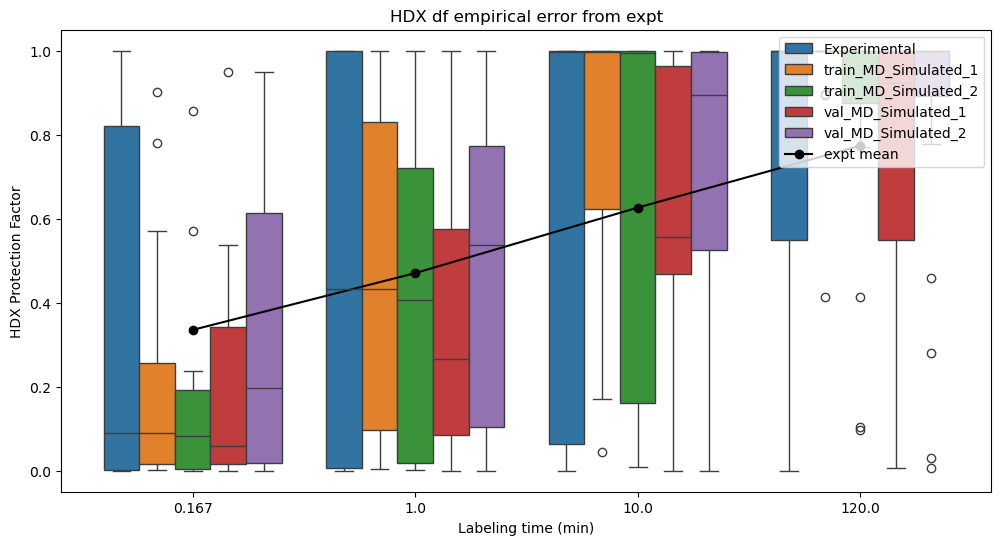

plotting paired errors
        0.167       1.0      10.0     120.0  peptide           calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0        Experimental   
1    0.090390  0.432930  0.996560  1.000000        1        Experimental   
2    0.026650  0.149330  0.801570  1.000000        2        Experimental   
3    0.186800  0.710100  1.000000  1.000000        3        Experimental   
4    0.998800  1.000000  1.000000  1.000000        4        Experimental   
..        ...       ...       ...       ...      ...                 ...   
112  0.482777  0.508120  0.575512  0.929900       15  val_MD_Simulated_2   
113  0.949650  0.999999  1.000000  1.000000       16  val_MD_Simulated_2   
114  0.461688  0.567890  0.883800  1.000000       17  val_MD_Simulated_2   
115  0.014315  0.081373  0.503384  0.981188       18  val_MD_Simulated_2   
116  0.020163  0.111471  0.563136  0.981188       19  val_MD_Simulated_2   

     ResStr  ResEnd                                             

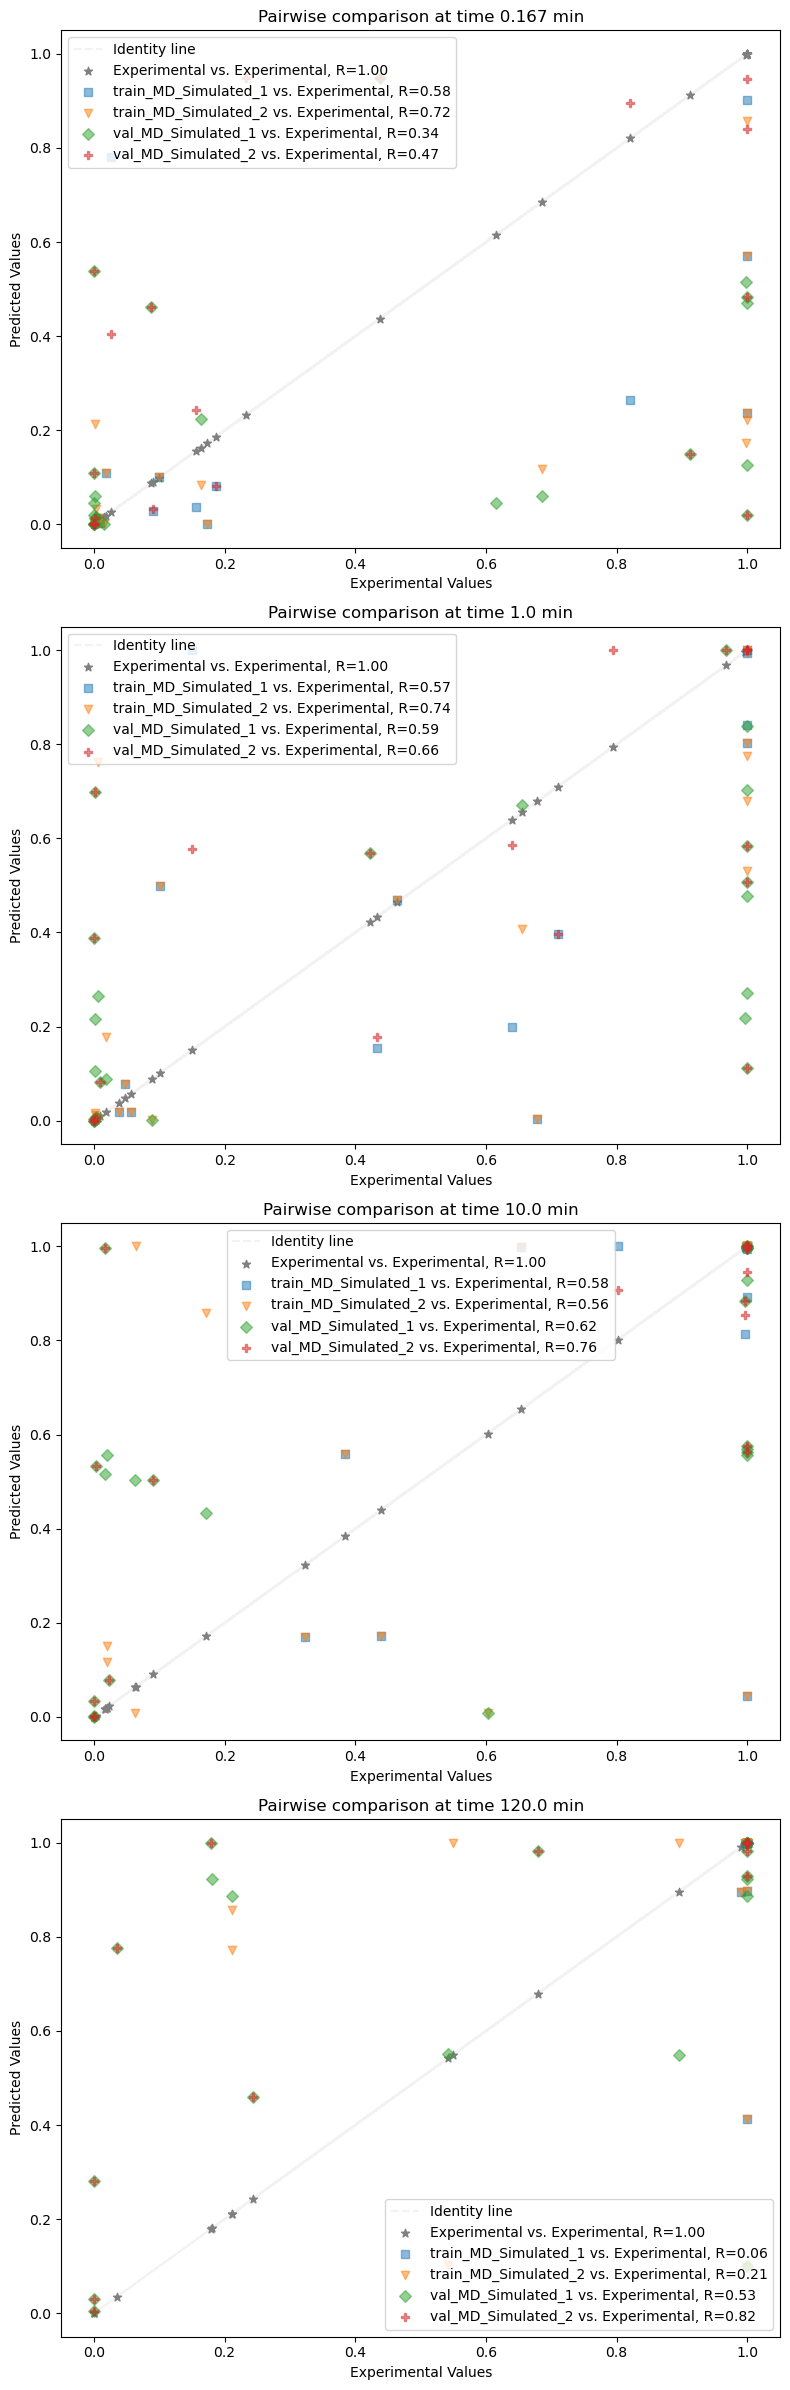

plotting paired trainval agreement
        0.167       1.0      10.0     120.0  peptide           calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0        Experimental   
1    0.090390  0.432930  0.996560  1.000000        1        Experimental   
2    0.026650  0.149330  0.801570  1.000000        2        Experimental   
3    0.186800  0.710100  1.000000  1.000000        3        Experimental   
4    0.998800  1.000000  1.000000  1.000000        4        Experimental   
..        ...       ...       ...       ...      ...                 ...   
112  0.482777  0.508120  0.575512  0.929900       15  val_MD_Simulated_2   
113  0.949650  0.999999  1.000000  1.000000       16  val_MD_Simulated_2   
114  0.461688  0.567890  0.883800  1.000000       17  val_MD_Simulated_2   
115  0.014315  0.081373  0.503384  0.981188       18  val_MD_Simulated_2   
116  0.020163  0.111471  0.563136  0.981188       19  val_MD_Simulated_2   

     ResStr  ResEnd                                 

/home/alexi/Documents/ValDX/ValDX/HDX_plots.py:1368: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([[t, R, arg]], columns=["time", "R", "calc_name"])])
/home/alexi/Documents/ValDX/ValDX/HDX_plots.py:1387: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = pd.concat([plot_df, pd.DataFrame({"time": t, "Type": "Train", "R": train_R, str(key):train})], ignore_index=True)


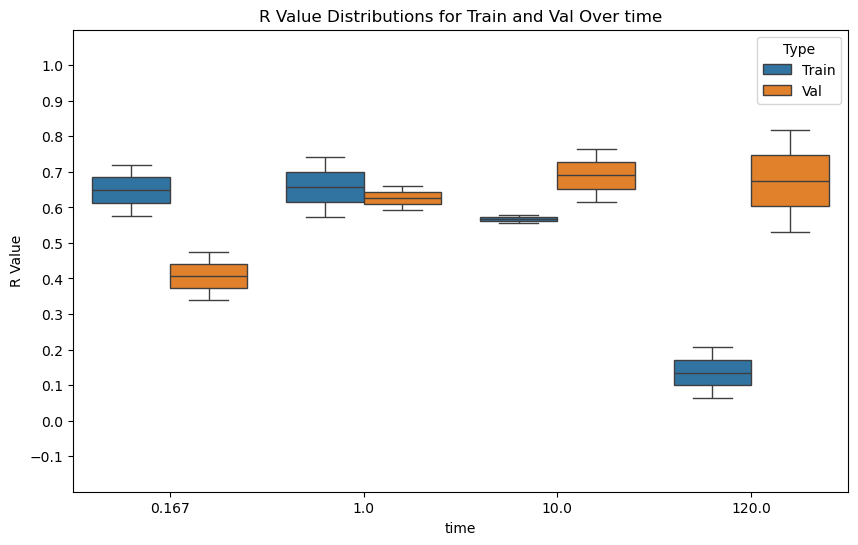

nan_df
        0.167       1.0      10.0     120.0  peptide             calc_name  \
0    0.036540  0.199820  0.892380  1.000000        0  train_MD_Simulated_1   
1    0.027720  0.154920  0.814230  1.000000        1  train_MD_Simulated_1   
2    0.781010  0.999890  1.000000  1.000000        2  train_MD_Simulated_1   
3    0.081130  0.397510  0.993700  1.000000        3  train_MD_Simulated_1   
4    0.902760  1.000000  1.000000  1.000000        4  train_MD_Simulated_1   
..        ...       ...       ...       ...      ...                   ...   
147  0.482777  0.508120  0.575512  0.929900       15    val_MD_Simulated_2   
148  0.949650  0.999999  1.000000  1.000000       16    val_MD_Simulated_2   
149  0.461688  0.567890  0.883800  1.000000       17    val_MD_Simulated_2   
150  0.014315  0.081373  0.503384  0.981188       18    val_MD_Simulated_2   
151  0.020163  0.111471  0.563136  0.981188       19    val_MD_Simulated_2   

     ResStr  ResEnd                                     

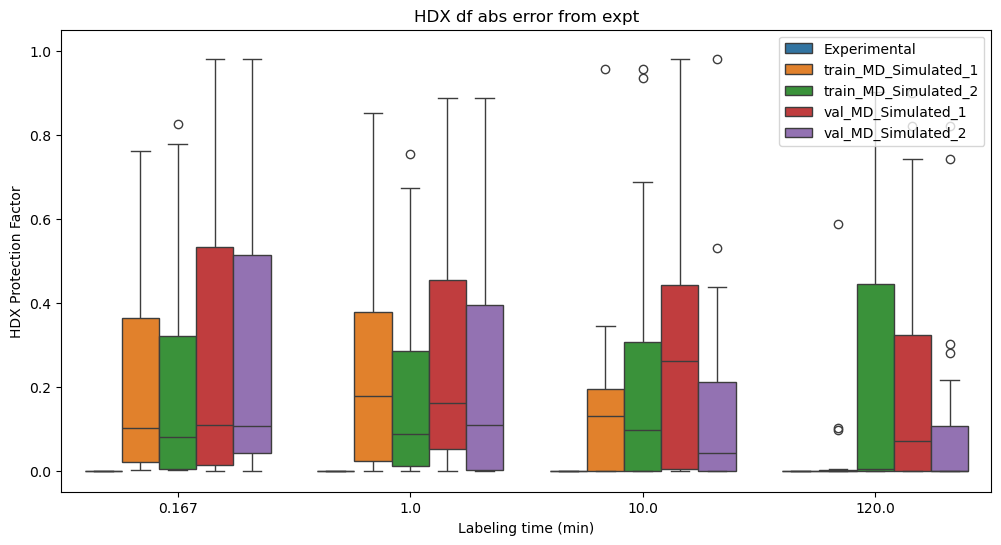

plot_dfracs_compare_MSE
       0.167      1.0     10.0    120.0  peptide             calc_name  \
0    0.03654  0.19982  0.89238  1.00000        0  train_MD_Simulated_1   
1    0.02772  0.15492  0.81423  1.00000        1  train_MD_Simulated_1   
2    0.78101  0.99989  1.00000  1.00000        2  train_MD_Simulated_1   
3    0.08113  0.39751  0.99370  1.00000        3  train_MD_Simulated_1   
4    0.90276  1.00000  1.00000  1.00000        4  train_MD_Simulated_1   
..       ...      ...      ...      ...      ...                   ...   
188  0.00963  0.05627  0.43963  0.99904       36          Experimental   
189  0.01757  0.10068  0.65396  1.00000       37          Experimental   
190  0.09888  0.46390  0.99804  1.00000       38          Experimental   
191  0.00650  0.03831  0.32339  0.99079       39          Experimental   
192  0.17259  0.67841  0.99999  1.00000       40          Experimental   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1       NaN     NaN  NaN  
2     

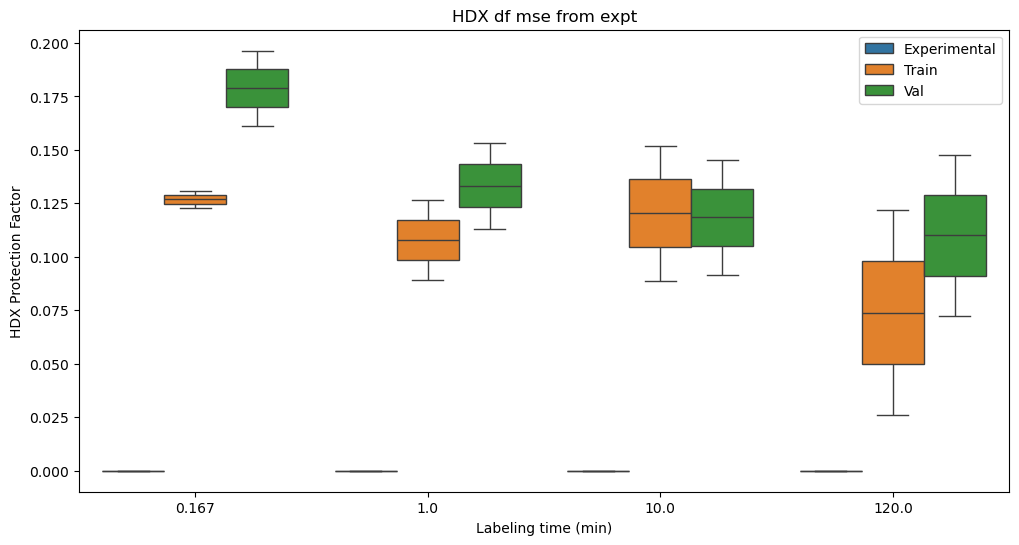

Saving experiment to:  logs/random_R316_1707323368.pkl


/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:525: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
Experiment name sequential_R2 already exists. Attempting to change name to sequential_R20
Experiment name sequential_R2 already exists. Attempting to change name to sequential_R21
Experiment name sequential_R2 already exists. Attempting to change name to sequential_R22
Experiment name sequential_R2 already exists. Attempting to change name to sequential_R23
Experiment name sequential_R2 already exists. Attempting to change name to sequential_R24
Experiment name sequential_R2 already exists. Attempting to change name to sequential_R25
Experiment name sequential_R2 already exists. Attempting to change name to sequential_R26
Experiment name sequential_R2 already exists. Attempting to change name to sequential_R27
Experiment name sequential_R2 already exists. Attempting to change name to sequential_R28
Experiment name sequential_R2 already exists. Attempting to change name to sequential_R29
Experiment name sequential_R2

/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:329: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_segs["calc_name"] = train_rep_name
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:330: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_segs["calc_name"] = val_rep_name
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
python /home/alexi/Documents/HDXer/HDXer/calc_hdx.py -t /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/APO_amber99_5PTI_1-nojump_xtal.xtc -p /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/APO_amber99_5PTI_1-nojump.pdb -m BestVendruscolo -log /home/alexi/Documents/ValDX/data/sequential_R214/train_MD_Simulated_1/calc_hdx_train_MD_Simulated_1.log -out /home/alexi/Documents/ValDX/data/sequential_R214/train_MD_Simulated_1/out__train_MD_Simulated_1 -seg /home/alexi/Documents/ValDX/data/sequential_R214/train_MD_Simulated_1/train_residue_segs__MD_Simulated_.txt -mopt "{ 'save_detailed' : True }" --times 0.167 1.0 10.0 120.0 -str 1
Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
Residue predictions complete


/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/

Path /home/alexi/Documents/ValDX/data/sequential_R214/train_MD_Simulated_1/out__train_MD_Simulated_1Segment_average_fractions.dat
AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 1
/home/alexi/Documents/ValDX/data/sequential_R214/train_MD_Simulated_1/train_MD_Simulated_1_expt_dfracs.dat
/home/alexi/Documents/ValDX/data/sequential_R214/train_MD_Simulated_1
/home/alexi/Documents/ValDX/data/sequential_R214/train_MD_Simulated_1/out__train_MD_Simulated_1Intrinsic_rates.dat
REWIGHTING train_MD_Simulated_1 with Exponent: 0
[{'do_reweight': False, 'do_params': False, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/home/alexi/Documents/ValDX/data/sequential_R214/train_MD_Simulated_1'], 'kint_file': '/home/alexi/Documents/ValDX/data/sequential_R214/train_MD_Simulated_1/out__train_MD_Simulated_1Intrinsic_rates.dat', 'exp_file': '/home/alexi/Documents/ValDX/data/sequential_R214/train_MD_Simulated_1/train_MD_Simulated_1_expt_dfracs.dat', 'times': array([  0.167,   1.   ,  10. 

/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:329: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_segs["calc_name"] = train_rep_name
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:330: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_segs["calc_name"] = val_rep_name
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
python /home/alexi/Documents/HDXer/HDXer/calc_hdx.py -t /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/APO_amber99_5PTI_1-nojump_xtal.xtc -p /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/APO_amber99_5PTI_1-nojump.pdb -m BestVendruscolo -log /home/alexi/Documents/ValDX/data/sequential_R214/train_MD_Simulated_2/calc_hdx_train_MD_Simulated_2.log -out /home/alexi/Documents/ValDX/data/sequential_R214/train_MD_Simulated_2/out__train_MD_Simulated_2 -seg /home/alexi/Documents/ValDX/data/sequential_R214/train_MD_Simulated_2/train_residue_segs__MD_Simulated_.txt -mopt "{ 'save_detailed' : True }" --times 0.167 1.0 10.0 120.0 -str 1
Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
Residue predictions complete


/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/

Path /home/alexi/Documents/ValDX/data/sequential_R214/train_MD_Simulated_2/out__train_MD_Simulated_2Segment_average_fractions.dat
AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 2
/home/alexi/Documents/ValDX/data/sequential_R214/train_MD_Simulated_2/train_MD_Simulated_2_expt_dfracs.dat
/home/alexi/Documents/ValDX/data/sequential_R214/train_MD_Simulated_2
/home/alexi/Documents/ValDX/data/sequential_R214/train_MD_Simulated_2/out__train_MD_Simulated_2Intrinsic_rates.dat
REWIGHTING train_MD_Simulated_2 with Exponent: 0
[{'do_reweight': False, 'do_params': False, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/home/alexi/Documents/ValDX/data/sequential_R214/train_MD_Simulated_2'], 'kint_file': '/home/alexi/Documents/ValDX/data/sequential_R214/train_MD_Simulated_2/out__train_MD_Simulated_2Intrinsic_rates.dat', 'exp_file': '/home/alexi/Documents/ValDX/data/sequential_R214/train_MD_Simulated_2/train_MD_Simulated_2_expt_dfracs.dat', 'times': array([  0.167,   1.   ,  10. 

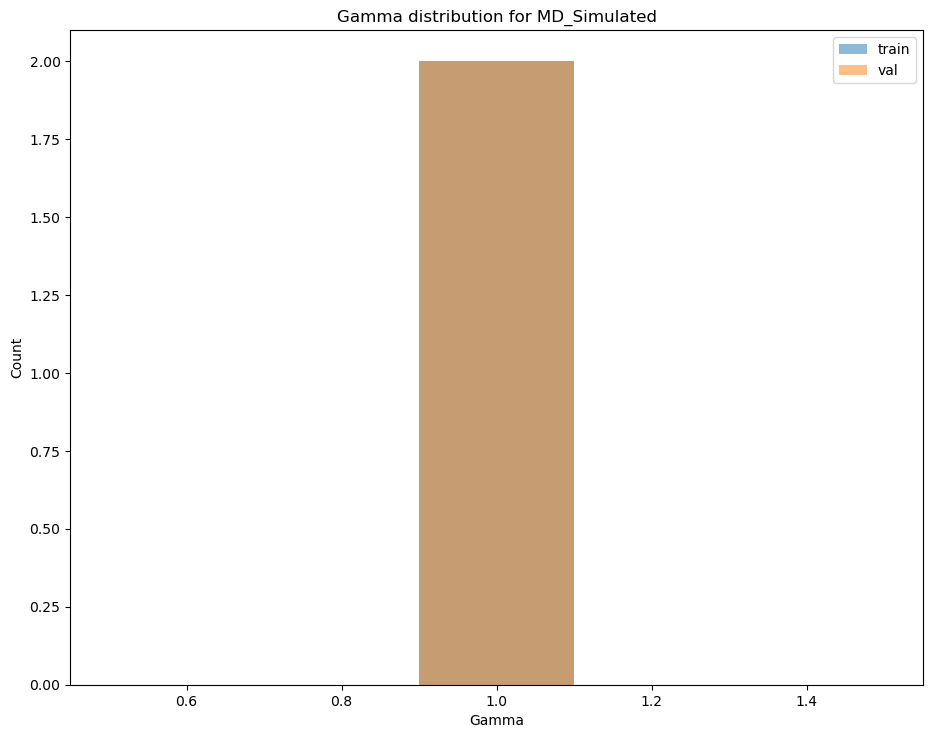

['train_MD_Simulated_1', 'train_MD_Simulated_2']
['val_MD_Simulated_1', 'val_MD_Simulated_2']
plot_dfracs_compare
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
200  0.008357  0.048621  0.365367  0.948120       36  test_MD_Simulated_2   
201  0.056148  0.259086  0.585551  0.948147       37  test_MD_Simulated_2   
202  0.104595  0.483750  0.998599  1.000000       38  test_MD_Simulated_2   
203  0.051581  0.243287  0.584419  0.947057       39  test_MD_Simulated_2   
204  0.001931  0.011488  0.107076  0.65

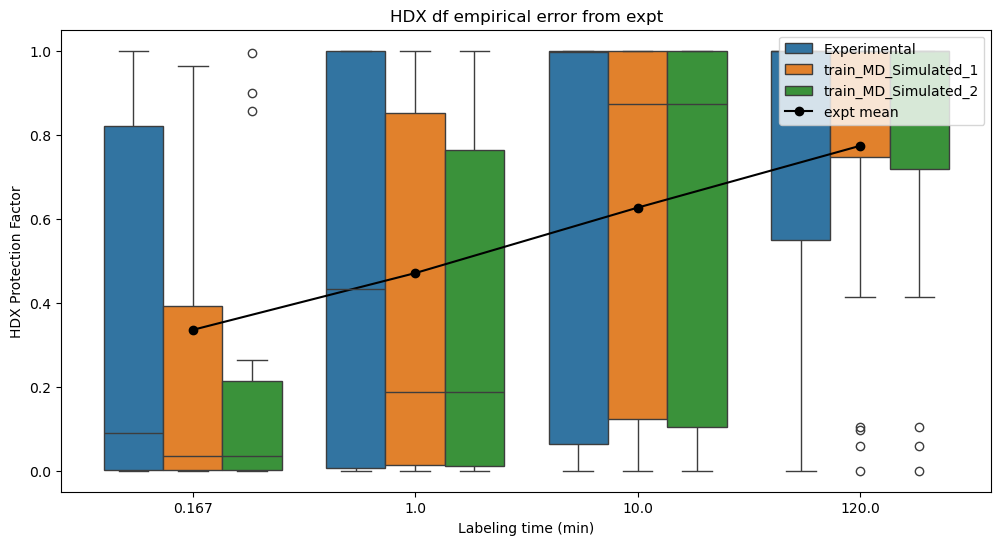

plot_dfracs_compare
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
200  0.008357  0.048621  0.365367  0.948120       36  test_MD_Simulated_2   
201  0.056148  0.259086  0.585551  0.948147       37  test_MD_Simulated_2   
202  0.104595  0.483750  0.998599  1.000000       38  test_MD_Simulated_2   
203  0.051581  0.243287  0.584419  0.947057       39  test_MD_Simulated_2   
204  0.001931  0.011488  0.107076  0.653837       40  test_MD_Simulated_2   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1

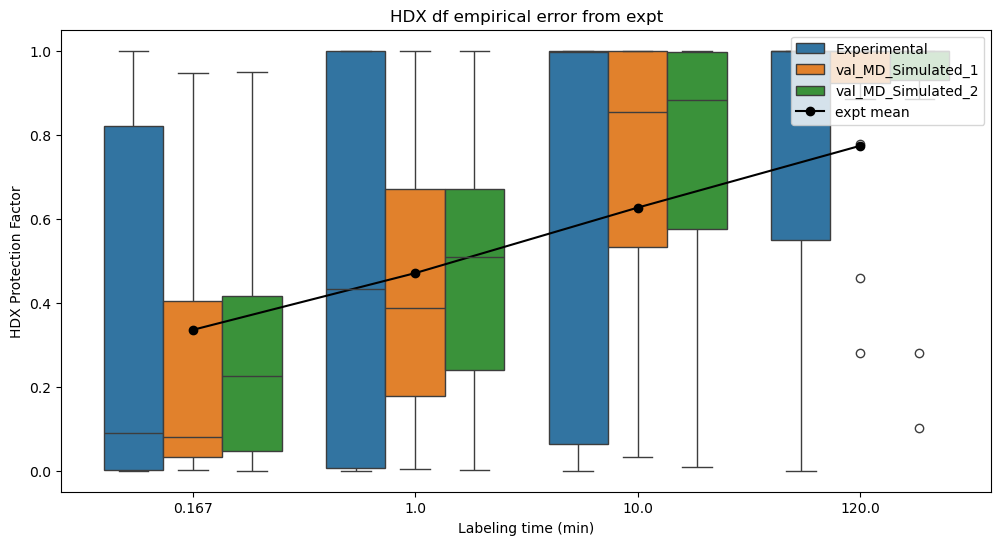

Restoring trainval peptide numbers
train_rep_names ['train_MD_Simulated_1', 'train_MD_Simulated_2']
val_rep_names ['val_MD_Simulated_1', 'val_MD_Simulated_2']
test_rep_names ['test_MD_Simulated_1', 'test_MD_Simulated_2']
train_rep_peptides [0, 4, 6, 8, 9, 12, 13, 15, 16, 17, 19, 24, 25, 26, 29, 32, 34, 35, 39, 40]
val_rep_peptides [1, 2, 3, 5, 7, 10, 11, 14, 18, 20, 21, 22, 23, 27, 28, 30, 31, 33, 36, 37, 38]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
train_rep_peptides [5, 6, 7, 8, 9, 10, 12, 13, 14, 19, 20, 22, 24, 26, 29, 31, 36, 37, 38, 40]
val_rep_peptides [0, 1, 2, 3, 4, 11, 15, 16, 17, 18, 21, 23, 25, 27, 28, 30, 32, 33, 34, 35, 39]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
manual merge df
       0.167       1.0      10.0 

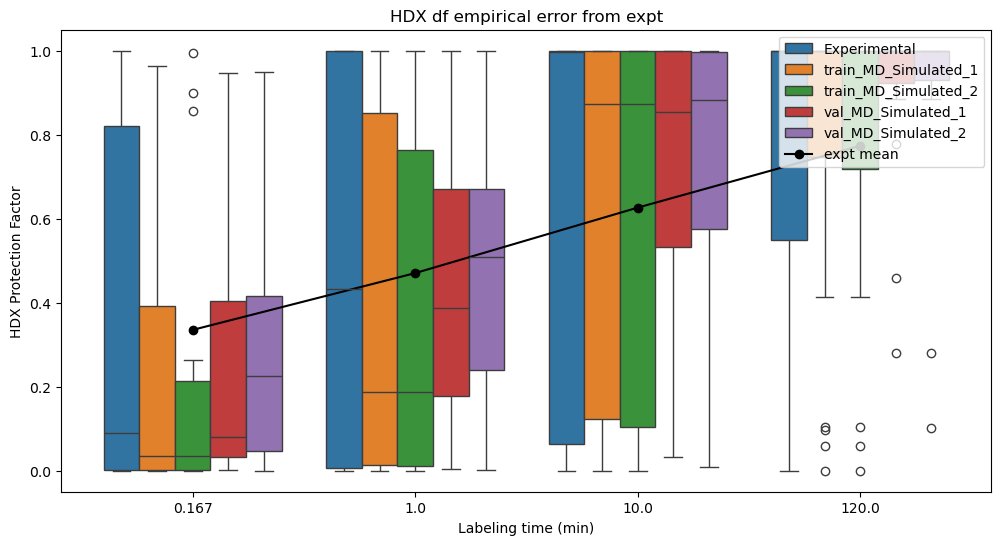

plotting paired errors
        0.167       1.0      10.0     120.0  peptide           calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0        Experimental   
1    0.090390  0.432930  0.996560  1.000000        1        Experimental   
2    0.026650  0.149330  0.801570  1.000000        2        Experimental   
3    0.186800  0.710100  1.000000  1.000000        3        Experimental   
4    0.998800  1.000000  1.000000  1.000000        4        Experimental   
..        ...       ...       ...       ...      ...                 ...   
118  0.416005  0.508033  0.574876  0.928629       32  val_MD_Simulated_2   
119  0.410108  0.907035  1.000000  1.000000       33  val_MD_Simulated_2   
120  0.404276  0.898347  1.000000  1.000000       34  val_MD_Simulated_2   
121  0.047709  0.239428  0.776315  0.999973       35  val_MD_Simulated_2   
122  0.051581  0.243287  0.584419  0.947057       39  val_MD_Simulated_2   

     ResStr  ResEnd                                             

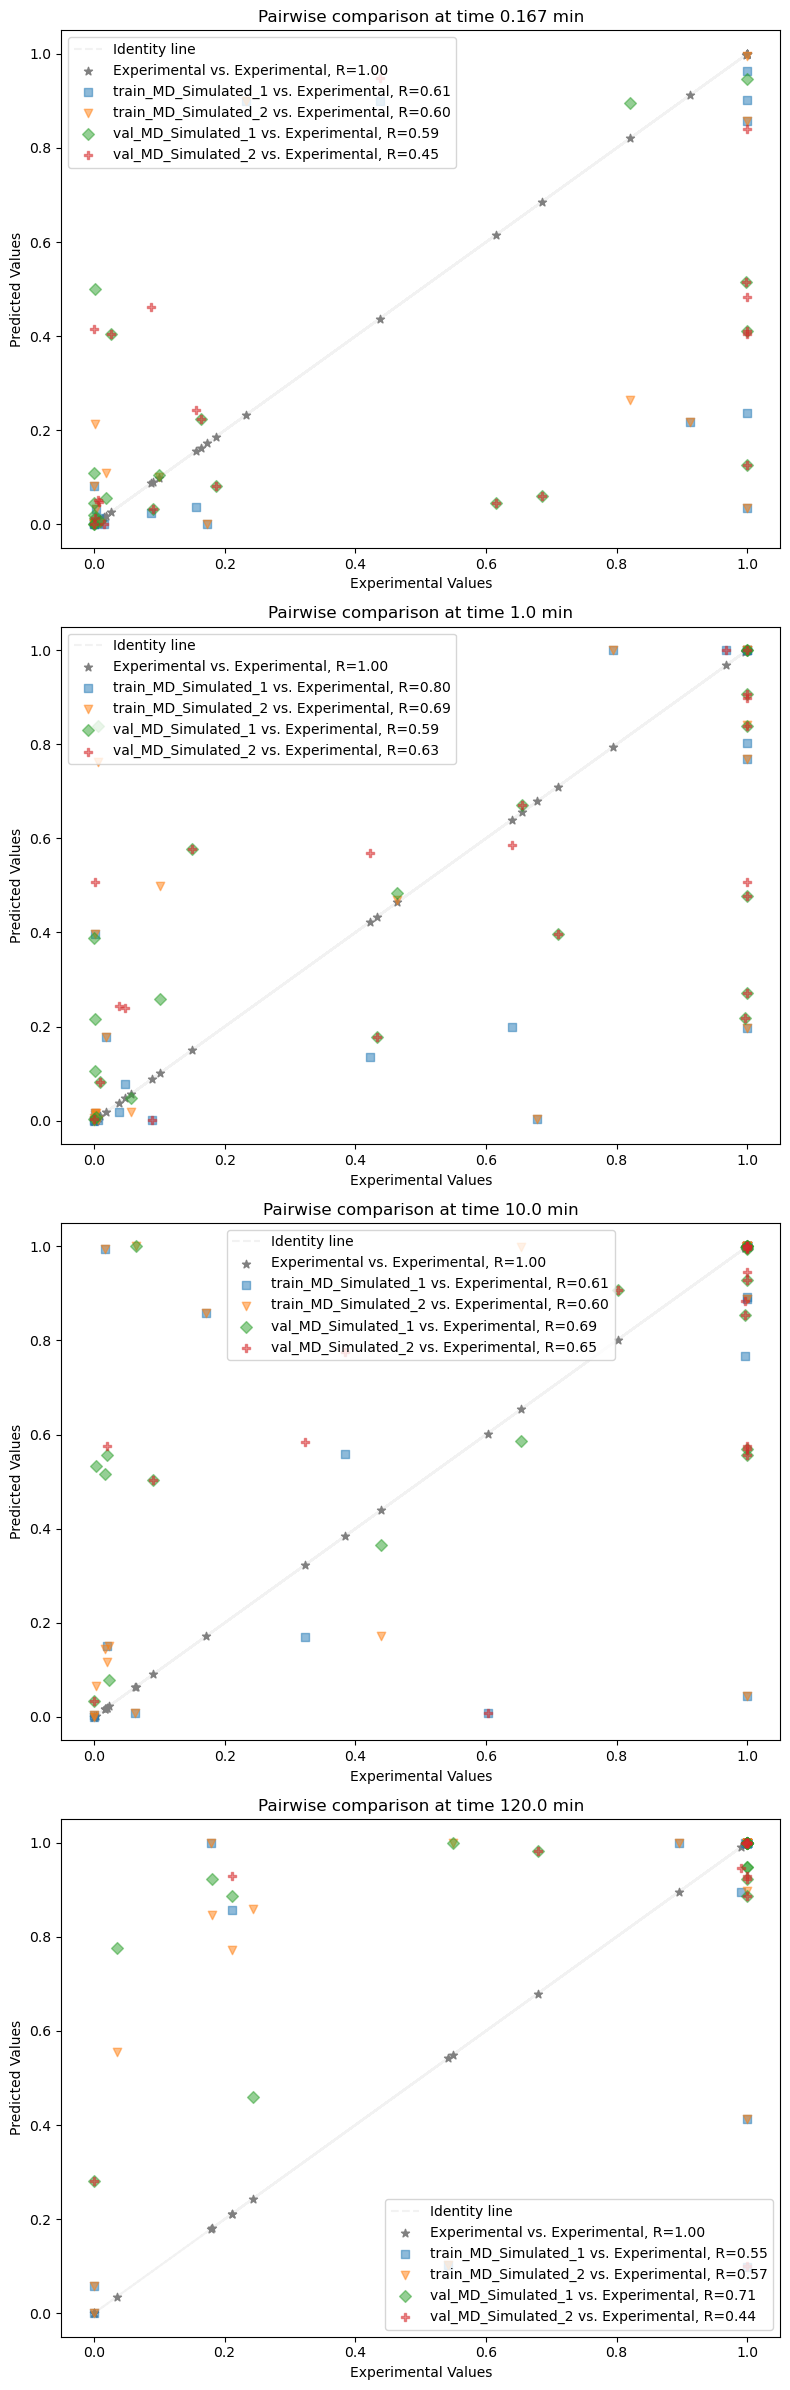

plotting paired trainval agreement
        0.167       1.0      10.0     120.0  peptide           calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0        Experimental   
1    0.090390  0.432930  0.996560  1.000000        1        Experimental   
2    0.026650  0.149330  0.801570  1.000000        2        Experimental   
3    0.186800  0.710100  1.000000  1.000000        3        Experimental   
4    0.998800  1.000000  1.000000  1.000000        4        Experimental   
..        ...       ...       ...       ...      ...                 ...   
118  0.416005  0.508033  0.574876  0.928629       32  val_MD_Simulated_2   
119  0.410108  0.907035  1.000000  1.000000       33  val_MD_Simulated_2   
120  0.404276  0.898347  1.000000  1.000000       34  val_MD_Simulated_2   
121  0.047709  0.239428  0.776315  0.999973       35  val_MD_Simulated_2   
122  0.051581  0.243287  0.584419  0.947057       39  val_MD_Simulated_2   

     ResStr  ResEnd                                 

/home/alexi/Documents/ValDX/ValDX/HDX_plots.py:1368: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([[t, R, arg]], columns=["time", "R", "calc_name"])])
/home/alexi/Documents/ValDX/ValDX/HDX_plots.py:1387: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = pd.concat([plot_df, pd.DataFrame({"time": t, "Type": "Train", "R": train_R, str(key):train})], ignore_index=True)


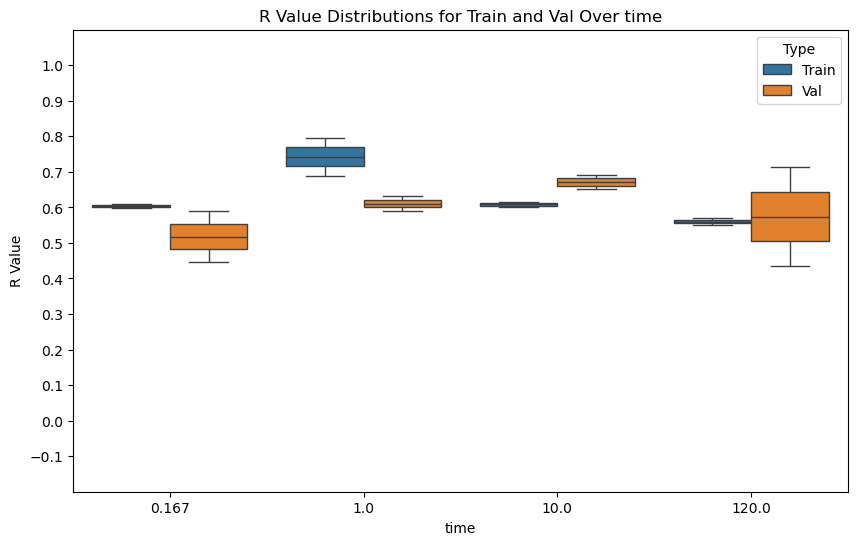

nan_df
        0.167       1.0      10.0     120.0  peptide             calc_name  \
0    0.036540  0.199820  0.892380  1.000000        0  train_MD_Simulated_1   
1    0.902760  1.000000  1.000000  1.000000        4  train_MD_Simulated_1   
2    0.899300  1.000000  1.000000  1.000000        6  train_MD_Simulated_1   
3    0.081130  0.397510  0.993700  1.000000        8  train_MD_Simulated_1   
4    0.217430  0.769640  1.000000  1.000000        9  train_MD_Simulated_1   
..        ...       ...       ...       ...      ...                   ...   
159  0.416005  0.508033  0.574876  0.928629       32    val_MD_Simulated_2   
160  0.410108  0.907035  1.000000  1.000000       33    val_MD_Simulated_2   
161  0.404276  0.898347  1.000000  1.000000       34    val_MD_Simulated_2   
162  0.047709  0.239428  0.776315  0.999973       35    val_MD_Simulated_2   
163  0.051581  0.243287  0.584419  0.947057       39    val_MD_Simulated_2   

     ResStr  ResEnd                                     

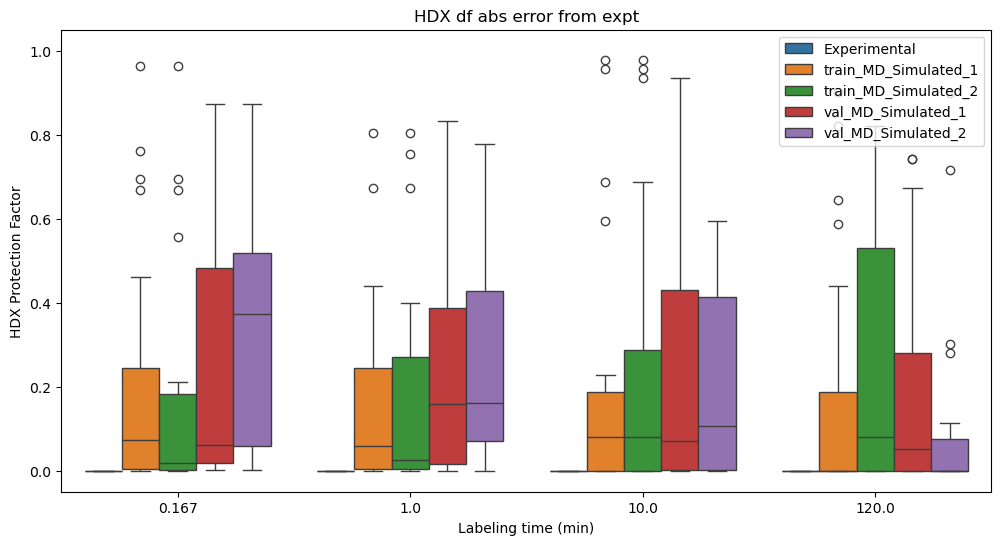

plot_dfracs_compare_MSE
       0.167      1.0     10.0    120.0  peptide             calc_name  \
0    0.03654  0.19982  0.89238  1.00000        0  train_MD_Simulated_1   
1    0.90276  1.00000  1.00000  1.00000        4  train_MD_Simulated_1   
2    0.89930  1.00000  1.00000  1.00000        6  train_MD_Simulated_1   
3    0.08113  0.39751  0.99370  1.00000        8  train_MD_Simulated_1   
4    0.21743  0.76964  1.00000  1.00000        9  train_MD_Simulated_1   
..       ...      ...      ...      ...      ...                   ...   
200  0.00963  0.05627  0.43963  0.99904       36          Experimental   
201  0.01757  0.10068  0.65396  1.00000       37          Experimental   
202  0.09888  0.46390  0.99804  1.00000       38          Experimental   
203  0.00650  0.03831  0.32339  0.99079       39          Experimental   
204  0.17259  0.67841  0.99999  1.00000       40          Experimental   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1       NaN     NaN  NaN  
2     

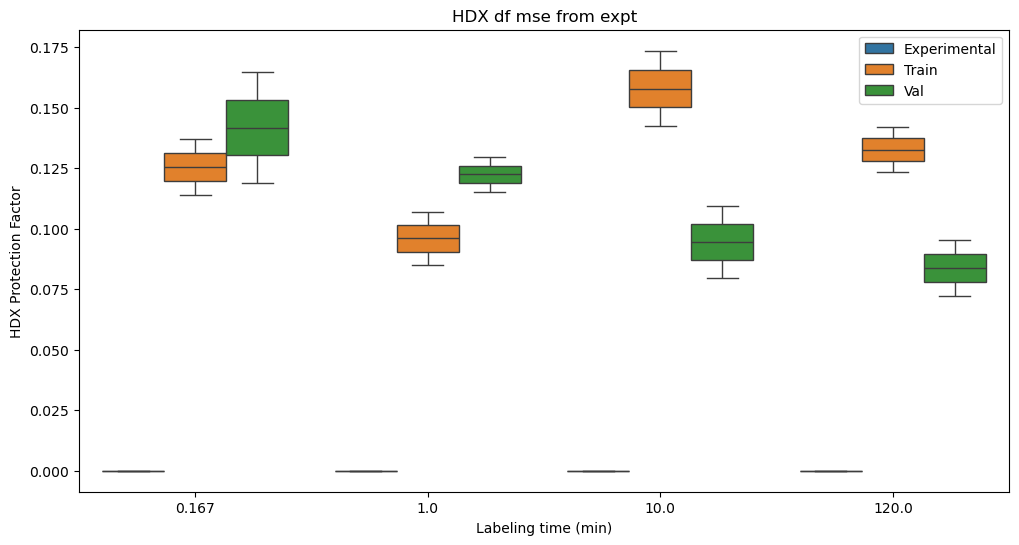

Saving experiment to:  logs/sequential_R214_1707323382.pkl


/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:525: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
Experiment name redundancy_R already exists. Attempting to change name to redundancy_R0
Experiment name redundancy_R already exists. Attempting to change name to redundancy_R1
Experiment name redundancy_R already exists. Attempting to change name to redundancy_R2
Experiment name redundancy_R already exists. Attempting to change name to redundancy_R3
Experiment name redundancy_R already exists. Attempting to change name to redundancy_R4
Experiment name redundancy_R already exists. Attempting to change name to redundancy_R5
Experiment name redundancy_R already exists. Attempting to change name to redundancy_R6
Experiment name redundancy_R already exists. Attempting to change name to redundancy_R7
Experiment name redundancy_R already exists. Attempting to change name to redundancy_R8
Experiment name redundancy_R already exists. Attempting to change name to redundancy_R9
Experiment name redundancy_R already exists. Atte

/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:329: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_segs["calc_name"] = train_rep_name
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:330: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_segs["calc_name"] = val_rep_name
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
python /home/alexi/Documents/HDXer/HDXer/calc_hdx.py -t /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/APO_amber99_5PTI_1-nojump_xtal.xtc -p /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/APO_amber99_5PTI_1-nojump.pdb -m BestVendruscolo -log /home/alexi/Documents/ValDX/data/redundancy_R24/train_MD_Simulated_1/calc_hdx_train_MD_Simulated_1.log -out /home/alexi/Documents/ValDX/data/redundancy_R24/train_MD_Simulated_1/out__train_MD_Simulated_1 -seg /home/alexi/Documents/ValDX/data/redundancy_R24/train_MD_Simulated_1/train_residue_segs__MD_Simulated_.txt -mopt "{ 'save_detailed' : True }" --times 0.167 1.0 10.0 120.0 -str 1
Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
Residue predictions complete


/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/

Path /home/alexi/Documents/ValDX/data/redundancy_R24/train_MD_Simulated_1/out__train_MD_Simulated_1Segment_average_fractions.dat
AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 1
/home/alexi/Documents/ValDX/data/redundancy_R24/train_MD_Simulated_1/train_MD_Simulated_1_expt_dfracs.dat
/home/alexi/Documents/ValDX/data/redundancy_R24/train_MD_Simulated_1
/home/alexi/Documents/ValDX/data/redundancy_R24/train_MD_Simulated_1/out__train_MD_Simulated_1Intrinsic_rates.dat
REWIGHTING train_MD_Simulated_1 with Exponent: 0
[{'do_reweight': False, 'do_params': False, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/home/alexi/Documents/ValDX/data/redundancy_R24/train_MD_Simulated_1'], 'kint_file': '/home/alexi/Documents/ValDX/data/redundancy_R24/train_MD_Simulated_1/out__train_MD_Simulated_1Intrinsic_rates.dat', 'exp_file': '/home/alexi/Documents/ValDX/data/redundancy_R24/train_MD_Simulated_1/train_MD_Simulated_1_expt_dfracs.dat', 'times': array([  0.167,   1.   ,  10.   , 120

/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:329: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_segs["calc_name"] = train_rep_name
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:330: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_segs["calc_name"] = val_rep_name
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
python /home/alexi/Documents/HDXer/HDXer/calc_hdx.py -t /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/APO_amber99_5PTI_1-nojump_xtal.xtc -p /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/APO_amber99_5PTI_1-nojump.pdb -m BestVendruscolo -log /home/alexi/Documents/ValDX/data/redundancy_R24/train_MD_Simulated_2/calc_hdx_train_MD_Simulated_2.log -out /home/alexi/Documents/ValDX/data/redundancy_R24/train_MD_Simulated_2/out__train_MD_Simulated_2 -seg /home/alexi/Documents/ValDX/data/redundancy_R24/train_MD_Simulated_2/train_residue_segs__MD_Simulated_.txt -mopt "{ 'save_detailed' : True }" --times 0.167 1.0 10.0 120.0 -str 1
Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
Residue predictions complete


/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/

Path /home/alexi/Documents/ValDX/data/redundancy_R24/train_MD_Simulated_2/out__train_MD_Simulated_2Segment_average_fractions.dat
AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 2
/home/alexi/Documents/ValDX/data/redundancy_R24/train_MD_Simulated_2/train_MD_Simulated_2_expt_dfracs.dat
/home/alexi/Documents/ValDX/data/redundancy_R24/train_MD_Simulated_2
/home/alexi/Documents/ValDX/data/redundancy_R24/train_MD_Simulated_2/out__train_MD_Simulated_2Intrinsic_rates.dat
REWIGHTING train_MD_Simulated_2 with Exponent: 0
[{'do_reweight': False, 'do_params': False, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/home/alexi/Documents/ValDX/data/redundancy_R24/train_MD_Simulated_2'], 'kint_file': '/home/alexi/Documents/ValDX/data/redundancy_R24/train_MD_Simulated_2/out__train_MD_Simulated_2Intrinsic_rates.dat', 'exp_file': '/home/alexi/Documents/ValDX/data/redundancy_R24/train_MD_Simulated_2/train_MD_Simulated_2_expt_dfracs.dat', 'times': array([  0.167,   1.   ,  10.   , 120

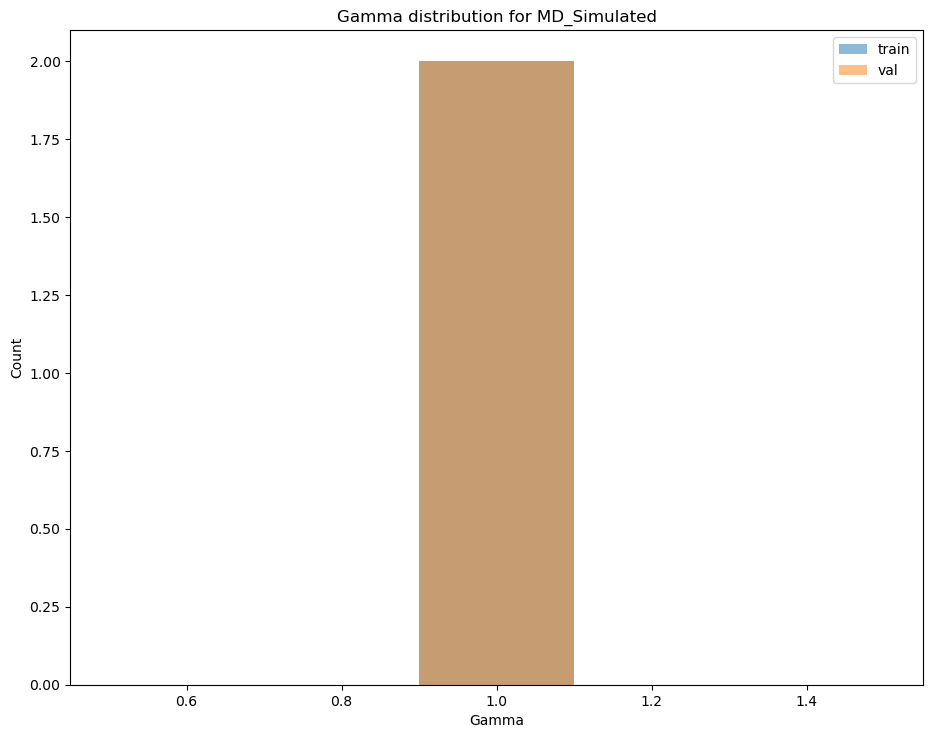

['train_MD_Simulated_1', 'train_MD_Simulated_2']
['val_MD_Simulated_1', 'val_MD_Simulated_2']
plot_dfracs_compare
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
200  0.008357  0.048621  0.365367  0.948120       36  test_MD_Simulated_2   
201  0.056148  0.259086  0.585551  0.948147       37  test_MD_Simulated_2   
202  0.104595  0.483750  0.998599  1.000000       38  test_MD_Simulated_2   
203  0.051581  0.243287  0.584419  0.947057       39  test_MD_Simulated_2   
204  0.001931  0.011488  0.107076  0.65

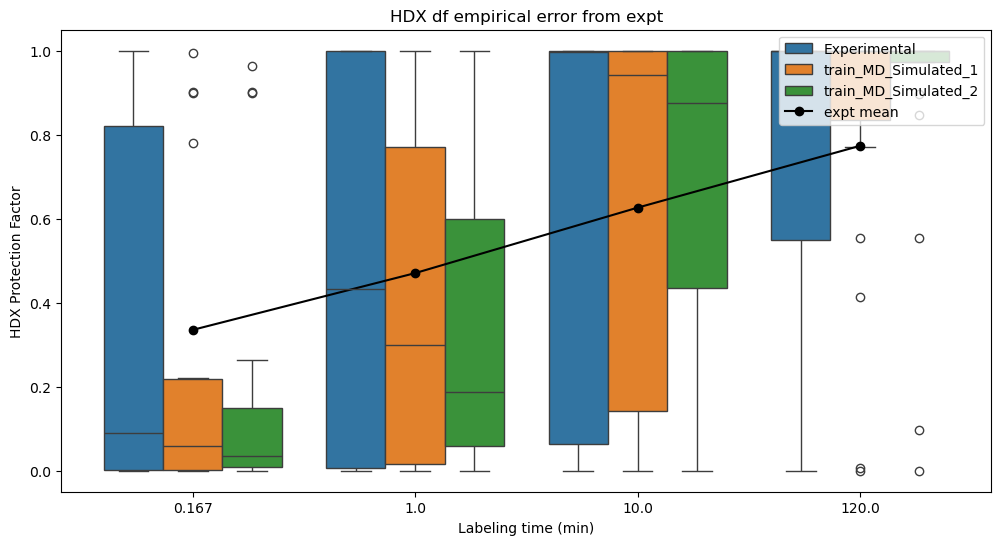

plot_dfracs_compare
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
200  0.008357  0.048621  0.365367  0.948120       36  test_MD_Simulated_2   
201  0.056148  0.259086  0.585551  0.948147       37  test_MD_Simulated_2   
202  0.104595  0.483750  0.998599  1.000000       38  test_MD_Simulated_2   
203  0.051581  0.243287  0.584419  0.947057       39  test_MD_Simulated_2   
204  0.001931  0.011488  0.107076  0.653837       40  test_MD_Simulated_2   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1

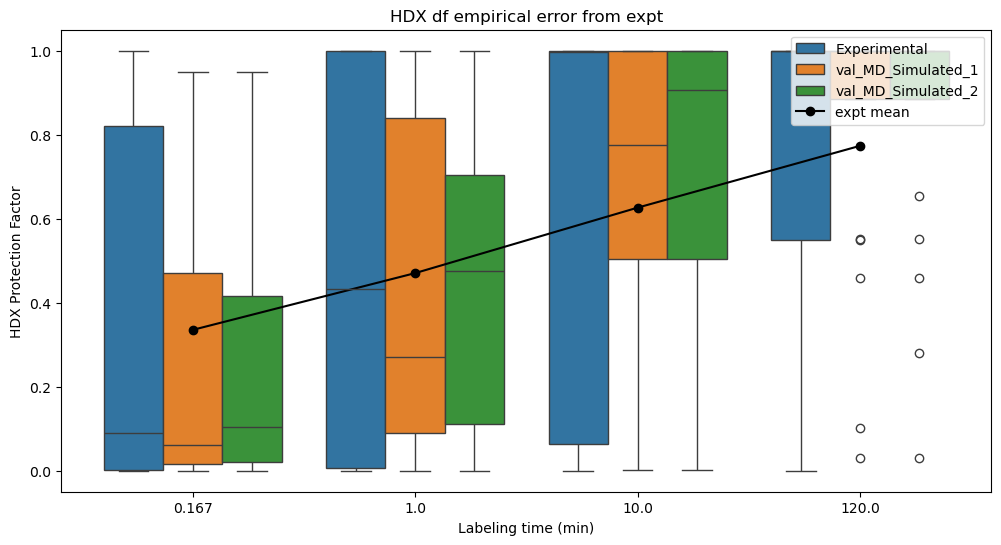

Restoring trainval peptide numbers
train_rep_names ['train_MD_Simulated_1', 'train_MD_Simulated_2']
val_rep_names ['val_MD_Simulated_1', 'val_MD_Simulated_2']
test_rep_names ['test_MD_Simulated_1', 'test_MD_Simulated_2']
train_rep_peptides [0, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 19, 21, 22, 27, 28, 32, 37, 39, 40]
val_rep_peptides [1, 5, 13, 14, 15, 16, 17, 18, 20, 23, 24, 25, 26, 29, 30, 31, 33, 34, 35, 36, 38]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
train_rep_peptides [0, 1, 4, 5, 6, 8, 10, 12, 15, 17, 20, 21, 23, 25, 26, 28, 34, 35, 36, 37]
val_rep_peptides [2, 3, 7, 9, 11, 13, 14, 16, 18, 19, 22, 24, 27, 29, 30, 31, 32, 33, 38, 39, 40]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
manual merge df
       0.167       1.0      10.0 

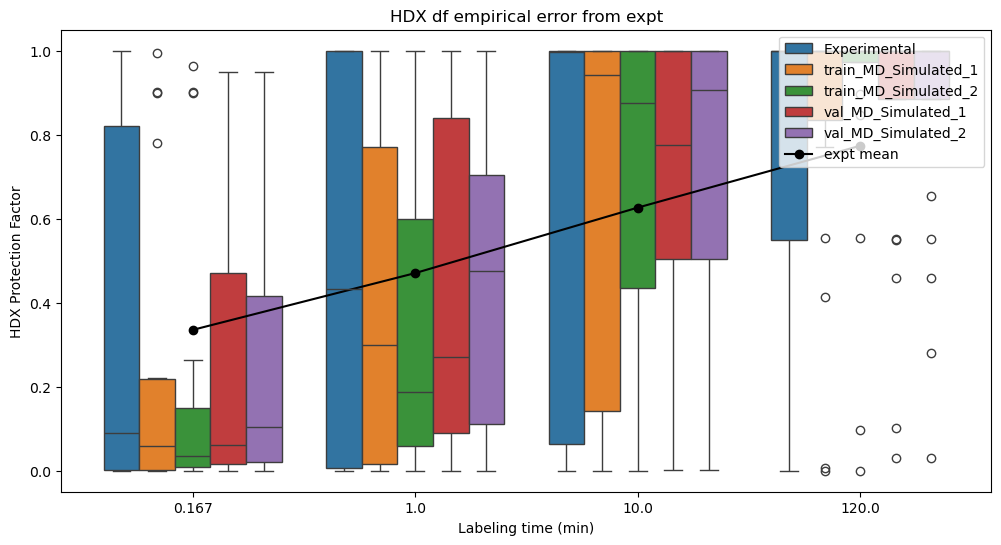

plotting paired errors
        0.167       1.0      10.0     120.0  peptide           calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0        Experimental   
1    0.090390  0.432930  0.996560  1.000000        1        Experimental   
2    0.026650  0.149330  0.801570  1.000000        2        Experimental   
3    0.186800  0.710100  1.000000  1.000000        3        Experimental   
4    0.998800  1.000000  1.000000  1.000000        4        Experimental   
..        ...       ...       ...       ...      ...                 ...   
118  0.416005  0.508033  0.574876  0.928629       32  val_MD_Simulated_2   
119  0.410108  0.907035  1.000000  1.000000       33  val_MD_Simulated_2   
120  0.104595  0.483750  0.998599  1.000000       38  val_MD_Simulated_2   
121  0.051581  0.243287  0.584419  0.947057       39  val_MD_Simulated_2   
122  0.001931  0.011488  0.107076  0.653837       40  val_MD_Simulated_2   

     ResStr  ResEnd                                             

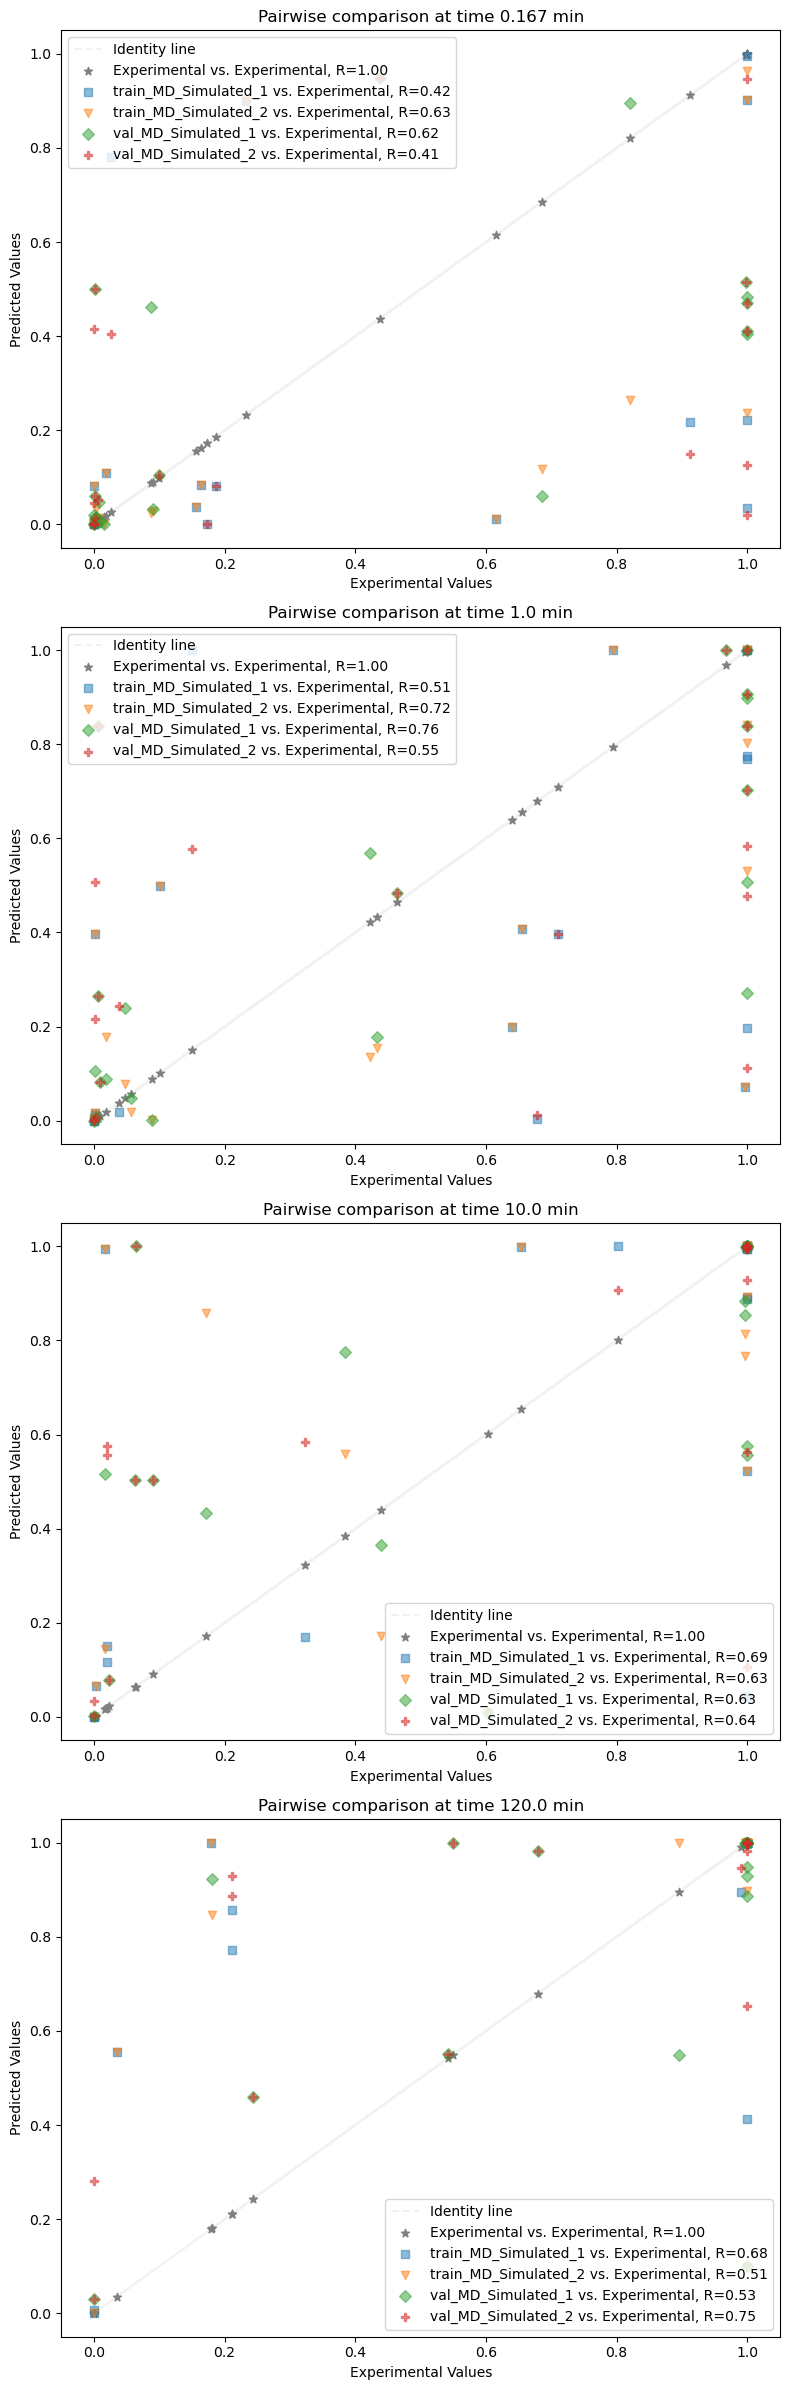

plotting paired trainval agreement
        0.167       1.0      10.0     120.0  peptide           calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0        Experimental   
1    0.090390  0.432930  0.996560  1.000000        1        Experimental   
2    0.026650  0.149330  0.801570  1.000000        2        Experimental   
3    0.186800  0.710100  1.000000  1.000000        3        Experimental   
4    0.998800  1.000000  1.000000  1.000000        4        Experimental   
..        ...       ...       ...       ...      ...                 ...   
118  0.416005  0.508033  0.574876  0.928629       32  val_MD_Simulated_2   
119  0.410108  0.907035  1.000000  1.000000       33  val_MD_Simulated_2   
120  0.104595  0.483750  0.998599  1.000000       38  val_MD_Simulated_2   
121  0.051581  0.243287  0.584419  0.947057       39  val_MD_Simulated_2   
122  0.001931  0.011488  0.107076  0.653837       40  val_MD_Simulated_2   

     ResStr  ResEnd                                 

/home/alexi/Documents/ValDX/ValDX/HDX_plots.py:1368: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([[t, R, arg]], columns=["time", "R", "calc_name"])])
/home/alexi/Documents/ValDX/ValDX/HDX_plots.py:1387: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = pd.concat([plot_df, pd.DataFrame({"time": t, "Type": "Train", "R": train_R, str(key):train})], ignore_index=True)


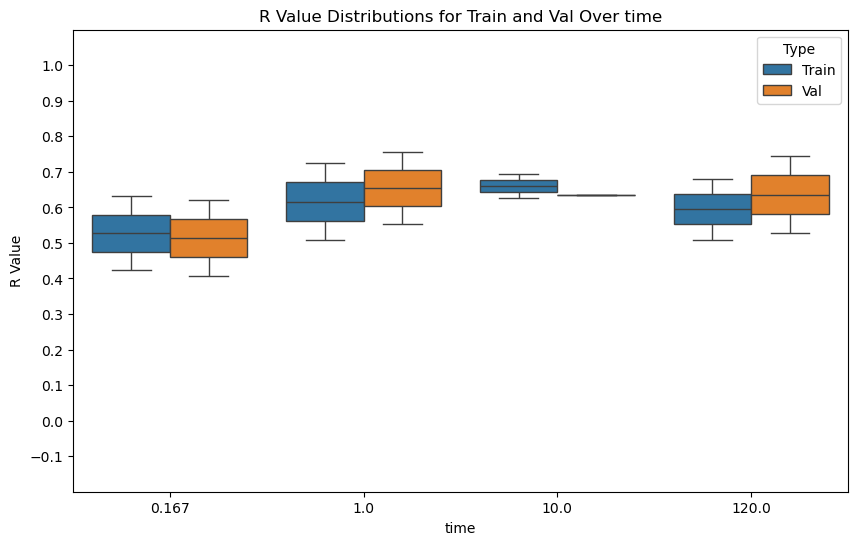

nan_df
        0.167       1.0      10.0     120.0  peptide             calc_name  \
0    0.036540  0.199820  0.892380  1.000000        0  train_MD_Simulated_1   
1    0.781010  0.999890  1.000000  1.000000        2  train_MD_Simulated_1   
2    0.081130  0.397510  0.993700  1.000000        3  train_MD_Simulated_1   
3    0.902760  1.000000  1.000000  1.000000        4  train_MD_Simulated_1   
4    0.899300  1.000000  1.000000  1.000000        6  train_MD_Simulated_1   
..        ...       ...       ...       ...      ...                   ...   
159  0.416005  0.508033  0.574876  0.928629       32    val_MD_Simulated_2   
160  0.410108  0.907035  1.000000  1.000000       33    val_MD_Simulated_2   
161  0.104595  0.483750  0.998599  1.000000       38    val_MD_Simulated_2   
162  0.051581  0.243287  0.584419  0.947057       39    val_MD_Simulated_2   
163  0.001931  0.011488  0.107076  0.653837       40    val_MD_Simulated_2   

     ResStr  ResEnd                                     

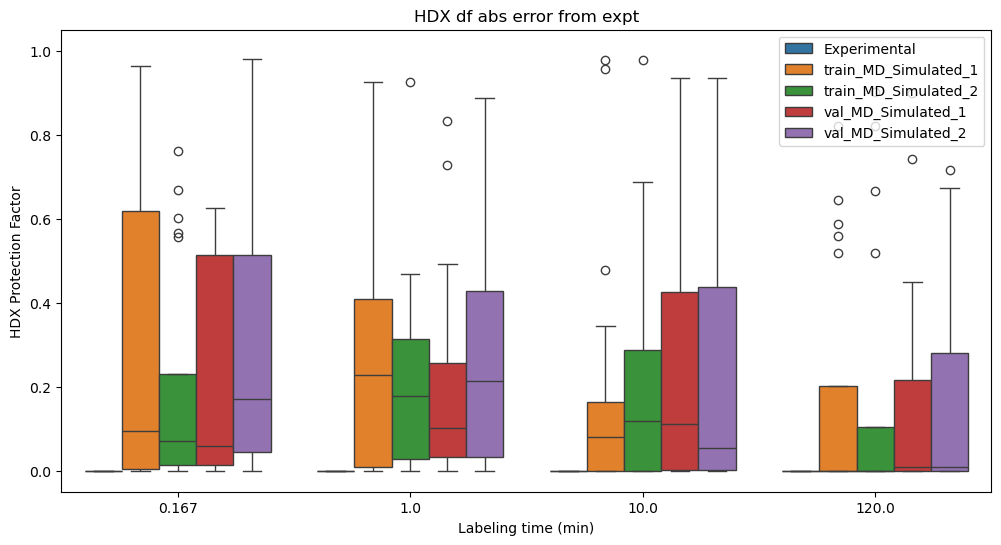

plot_dfracs_compare_MSE
       0.167      1.0     10.0    120.0  peptide             calc_name  \
0    0.03654  0.19982  0.89238  1.00000        0  train_MD_Simulated_1   
1    0.78101  0.99989  1.00000  1.00000        2  train_MD_Simulated_1   
2    0.08113  0.39751  0.99370  1.00000        3  train_MD_Simulated_1   
3    0.90276  1.00000  1.00000  1.00000        4  train_MD_Simulated_1   
4    0.89930  1.00000  1.00000  1.00000        6  train_MD_Simulated_1   
..       ...      ...      ...      ...      ...                   ...   
200  0.00963  0.05627  0.43963  0.99904       36          Experimental   
201  0.01757  0.10068  0.65396  1.00000       37          Experimental   
202  0.09888  0.46390  0.99804  1.00000       38          Experimental   
203  0.00650  0.03831  0.32339  0.99079       39          Experimental   
204  0.17259  0.67841  0.99999  1.00000       40          Experimental   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1       NaN     NaN  NaN  
2     

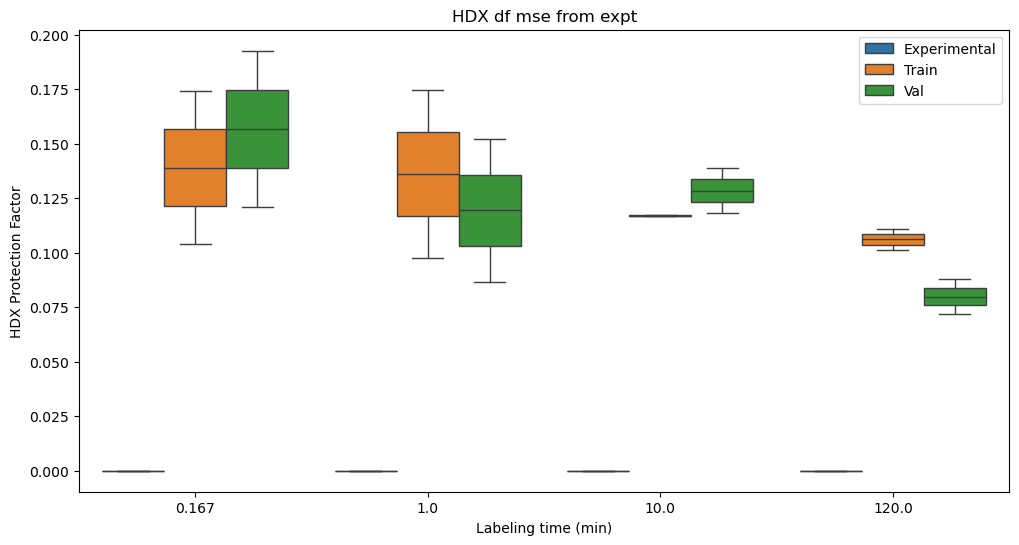

Saving experiment to:  logs/redundancy_R24_1707323417.pkl


/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:525: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


In [12]:

splits = ['R3', 'R2', 'R']
split_names = ['random', 'sequential', 'redundancy']
system = 'BPTIshaw_test'

raw_run_outputs = {}
analysis_dumps = {}
analysis_df = pd.DataFrame()
names = []
save_paths = []


for split, split_name in zip(splits, split_names):
    run_outputs, analysis_dump, df, name, save_path = run_split_test(split, split_name, system)
    raw_run_outputs[name] = run_outputs
    analysis_dumps.update(analysis_dump)
    analysis_df = pd.concat([analysis_df, df])
    names.append(name)
    save_paths.append(save_path)



In [13]:
print(analysis_dumps["random_R3"]["LogPfs"])

                                               LogPf  \
0  [4.8999999999999995, 10.049999999999999, 8.649...   
1  [4.8999999999999995, 10.049999999999999, 8.649...   
2  [3.8499999999999996, 6.6499999999999995, 4.55,...   
3  [4.8999999999999995, 10.049999999999999, 8.649...   
4  [8.049999999999999, 11.45, 5.949999999999999, ...   
5  [4.8999999999999995, 10.049999999999999, 8.649...   
6  [4.8999999999999995, 10.049999999999999, 8.649...   
7  [4.8999999999999995, 10.049999999999999, 8.649...   

                  calc_name  \
0      train_MD_Simulated_1   
1  no_weight_MD_Simulated_1   
2        val_MD_Simulated_1   
3       test_MD_Simulated_1   
4      train_MD_Simulated_2   
5  no_weight_MD_Simulated_2   
6        val_MD_Simulated_2   
7       test_MD_Simulated_2   

                                            Residues       name  
0  [4, 5, 6, 7, 10, 11, 12, 14, 46, 47, 48, 50, 5...  random_R3  
1  [4, 5, 6, 7, 10, 11, 12, 14, 15, 16, 17, 18, 1...  random_R3  
2  [17, 18, 19, 2

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


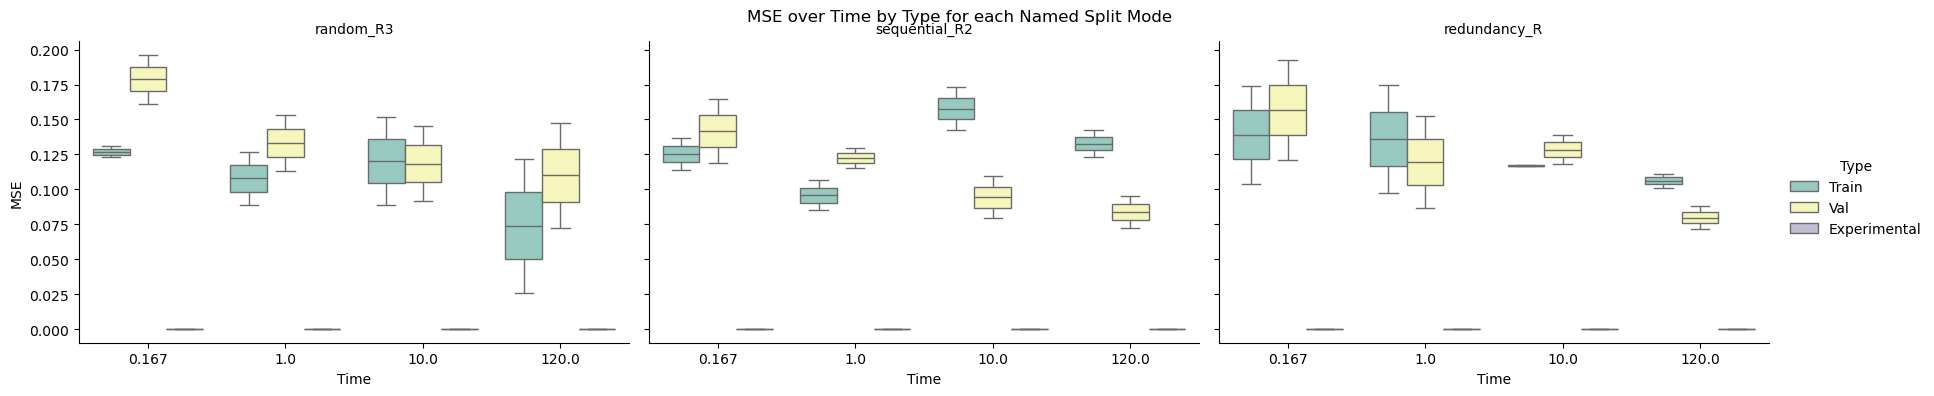

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace 'your_dataframe' with your actual DataFrame variable
df = analysis_df

# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('MSE over Time by Type for each Named Split Mode')

# Create boxplots
g = g.map(sns.boxplot, "time", "mse", "Type", palette="Set3")

# Adding some additional options for better visualization
g.add_legend(title='Type')
g.set_axis_labels("Time", "MSE")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


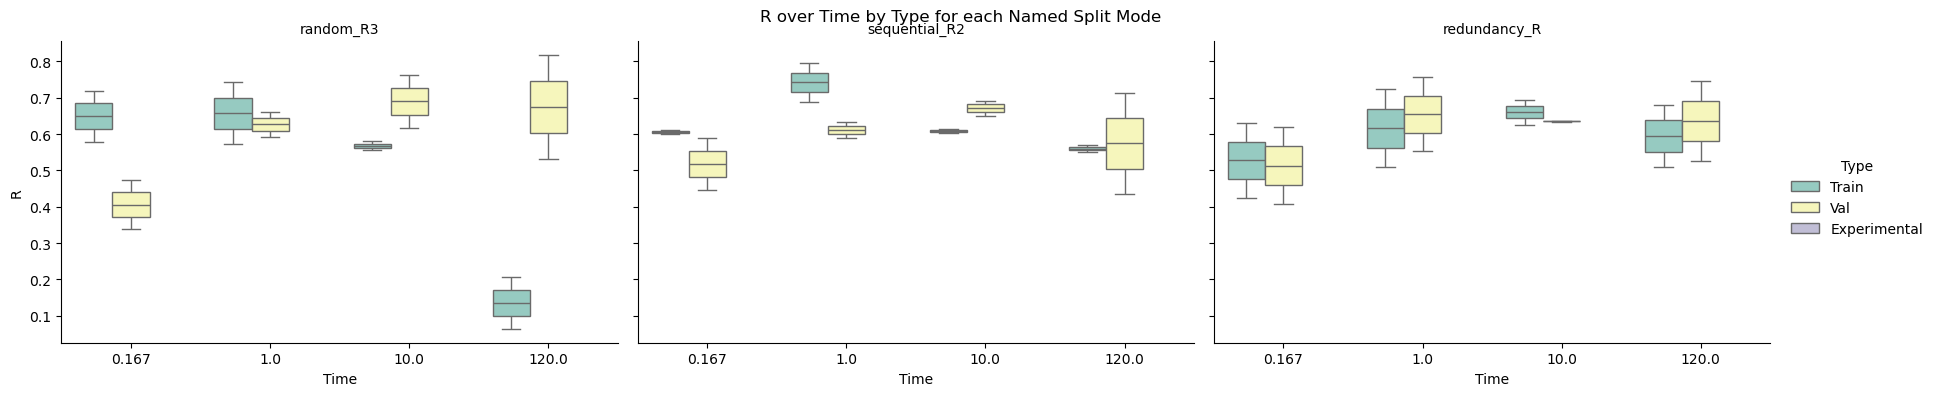

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace 'your_dataframe' with your actual DataFrame variable
df = analysis_df

# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('R over Time by Type for each Named Split Mode')

# Create boxplots
g = g.map(sns.boxplot, "time", "R", "Type", palette="Set3")

# Adding some additional options for better visualization
g.add_legend(title='Type')
g.set_axis_labels("Time", "R")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


In [16]:
print(analysis_dumps['random_R3']['LogPfs'])

                                               LogPf  \
0  [4.8999999999999995, 10.049999999999999, 8.649...   
1  [4.8999999999999995, 10.049999999999999, 8.649...   
2  [3.8499999999999996, 6.6499999999999995, 4.55,...   
3  [4.8999999999999995, 10.049999999999999, 8.649...   
4  [8.049999999999999, 11.45, 5.949999999999999, ...   
5  [4.8999999999999995, 10.049999999999999, 8.649...   
6  [4.8999999999999995, 10.049999999999999, 8.649...   
7  [4.8999999999999995, 10.049999999999999, 8.649...   

                  calc_name  \
0      train_MD_Simulated_1   
1  no_weight_MD_Simulated_1   
2        val_MD_Simulated_1   
3       test_MD_Simulated_1   
4      train_MD_Simulated_2   
5  no_weight_MD_Simulated_2   
6        val_MD_Simulated_2   
7       test_MD_Simulated_2   

                                            Residues       name  
0  [4, 5, 6, 7, 10, 11, 12, 14, 46, 47, 48, 50, 5...  random_R3  
1  [4, 5, 6, 7, 10, 11, 12, 14, 15, 16, 17, 18, 1...  random_R3  
2  [17, 18, 19, 2

                                               LogPf  \
0  [4.8999999999999995, 10.049999999999999, 8.649...   
1  [4.8999999999999995, 10.049999999999999, 8.649...   
2  [3.8499999999999996, 6.6499999999999995, 4.55,...   
3  [4.8999999999999995, 10.049999999999999, 8.649...   
4  [8.049999999999999, 11.45, 5.949999999999999, ...   
5  [4.8999999999999995, 10.049999999999999, 8.649...   
6  [4.8999999999999995, 10.049999999999999, 8.649...   
7  [4.8999999999999995, 10.049999999999999, 8.649...   
0  [4.8999999999999995, 10.049999999999999, 4.899...   
1  [4.8999999999999995, 10.049999999999999, 8.649...   
2  [10.049999999999999, 8.649999999999999, 4.1999...   
3  [4.8999999999999995, 10.049999999999999, 8.649...   
4  [5.25, 3.8499999999999996, 4.8, 3.849999999999...   
5  [4.8999999999999995, 10.049999999999999, 8.649...   
6  [4.8999999999999995, 10.049999999999999, 8.649...   
7  [4.8999999999999995, 10.049999999999999, 8.649...   
0  [4.8999999999999995, 10.049999999999999, 8.64

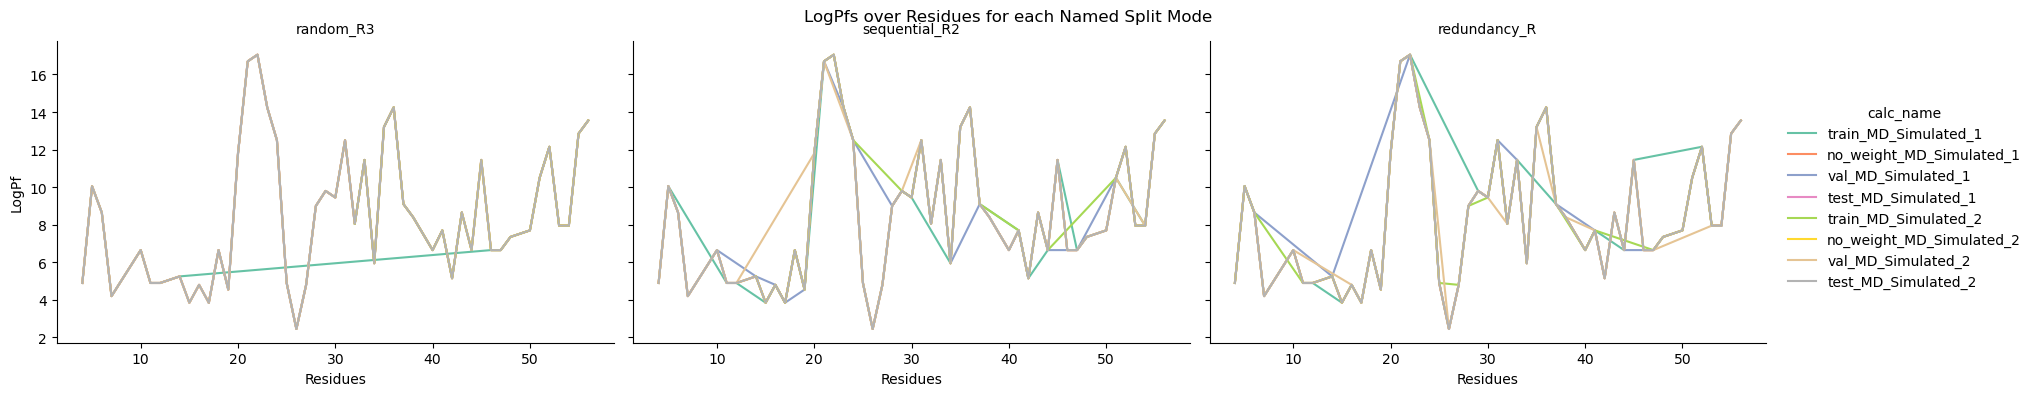

In [17]:
# plot LogPfs by Residues colour by calc_name facet wrap by name
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
LogPfs = pd.concat([analysis_dumps[i]["LogPfs"] for i in names])

print(LogPfs)

LogPfs_df = LogPfs.explode(['LogPf','Residues'])


# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(LogPfs_df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('LogPfs over Residues for each Named Split Mode')

# Create lineplots
g = g.map(sns.lineplot, "Residues", "LogPf", "calc_name", palette="Set2")

# Adding some additional options for better visualization
g.add_legend(title='calc_name')
g.set_axis_labels("Residues", "LogPf")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


In [18]:
LogPfs_df.head()

# calculate the cross correlation of the LogPf for each Calc_name


grouped = LogPfs_df.groupby(['name', 'calc_name'])

In [19]:
print(grouped.head())

    LogPf             calc_name Residues          name
0     4.9  train_MD_Simulated_1        4     random_R3
0   10.05  train_MD_Simulated_1        5     random_R3
0    8.65  train_MD_Simulated_1        6     random_R3
0     4.2  train_MD_Simulated_1        7     random_R3
0    6.65  train_MD_Simulated_1       10     random_R3
..    ...                   ...      ...           ...
7     4.9   test_MD_Simulated_2        4  redundancy_R
7   10.05   test_MD_Simulated_2        5  redundancy_R
7    8.65   test_MD_Simulated_2        6  redundancy_R
7     4.2   test_MD_Simulated_2        7  redundancy_R
7    6.65   test_MD_Simulated_2       10  redundancy_R

[120 rows x 4 columns]


In [20]:
# compute the cross correlation of LogPf between all residue pairs and split by calc_name and name

import numpy as np

cross_corr_matrices = pd.DataFrame()
for name, group in grouped:
    print(name)
    group = group.pivot(columns='Residues', values='LogPf')
    # print(group)
    Pfs = group.values.tolist()[0]
    Pfs = np.array(Pfs)
    print(Pfs.shape)
    # print(Pfs[0])
    zeros = np.zeros_like(Pfs)
    Pfs = np.stack([Pfs, zeros],)
    # print(Pfs)
        # find the cross correlation matrix between all pairs
    cov = np.cov(Pfs.T)
    # print(cov.shape)
    cross_correlation_matrix = pd.DataFrame({"cov_matrix": [cov], "name": name[0], "calc_name": name[1]})
    print(cov.shape)
    # continue
    cross_corr_matrices = pd.concat([cross_corr_matrices, cross_correlation_matrix])
    



('random_R3', 'no_weight_MD_Simulated_1')
(48,)
(48, 48)
('random_R3', 'no_weight_MD_Simulated_2')
(48,)
(48, 48)
('random_R3', 'test_MD_Simulated_1')
(48,)
(48, 48)
('random_R3', 'test_MD_Simulated_2')
(48,)
(48, 48)
('random_R3', 'train_MD_Simulated_1')
(18,)
(18, 18)
('random_R3', 'train_MD_Simulated_2')
(23,)
(23, 23)
('random_R3', 'val_MD_Simulated_1')
(26,)
(26, 26)
('random_R3', 'val_MD_Simulated_2')
(24,)
(24, 24)
('redundancy_R', 'no_weight_MD_Simulated_1')
(48,)
(48, 48)
('redundancy_R', 'no_weight_MD_Simulated_2')
(48,)
(48, 48)
('redundancy_R', 'test_MD_Simulated_1')
(48,)
(48, 48)
('redundancy_R', 'test_MD_Simulated_2')
(48,)
(48, 48)
('redundancy_R', 'train_MD_Simulated_1')
(31,)
(31, 31)
('redundancy_R', 'train_MD_Simulated_2')
(34,)
(34, 34)
('redundancy_R', 'val_MD_Simulated_1')
(30,)
(30, 30)
('redundancy_R', 'val_MD_Simulated_2')
(34,)
(34, 34)
('sequential_R2', 'no_weight_MD_Simulated_1')
(48,)
(48, 48)
('sequential_R2', 'no_weight_MD_Simulated_2')
(48,)
(48, 48)
('

In [21]:
print(cross_corr_matrices.head())

                                          cov_matrix       name  \
0  [[12.004999999999997, 24.622499999999995, 21.1...  random_R3   
0  [[12.004999999999997, 24.622499999999995, 21.1...  random_R3   
0  [[12.004999999999997, 24.622499999999995, 21.1...  random_R3   
0  [[12.004999999999997, 24.622499999999995, 21.1...  random_R3   
0  [[12.004999999999997, 24.622499999999995, 21.1...  random_R3   

                  calc_name  
0  no_weight_MD_Simulated_1  
0  no_weight_MD_Simulated_2  
0       test_MD_Simulated_1  
0       test_MD_Simulated_2  
0      train_MD_Simulated_1  


In [22]:
print(cross_corr_matrices['cov_matrix'].values)

[array([[12.005  , 24.6225 , 21.1925 , ..., 19.4775 , 31.4825 , 33.1975 ],
        [24.6225 , 50.50125, 43.46625, ..., 39.94875, 64.57125, 68.08875],
        [21.1925 , 43.46625, 37.41125, ..., 34.38375, 55.57625, 58.60375],
        ...,
        [19.4775 , 39.94875, 34.38375, ..., 31.60125, 51.07875, 53.86125],
        [31.4825 , 64.57125, 55.57625, ..., 51.07875, 82.56125, 87.05875],
        [33.1975 , 68.08875, 58.60375, ..., 53.86125, 87.05875, 91.80125]])
 array([[12.005  , 24.6225 , 21.1925 , ..., 19.4775 , 31.4825 , 33.1975 ],
        [24.6225 , 50.50125, 43.46625, ..., 39.94875, 64.57125, 68.08875],
        [21.1925 , 43.46625, 37.41125, ..., 34.38375, 55.57625, 58.60375],
        ...,
        [19.4775 , 39.94875, 34.38375, ..., 31.60125, 51.07875, 53.86125],
        [31.4825 , 64.57125, 55.57625, ..., 51.07875, 82.56125, 87.05875],
        [33.1975 , 68.08875, 58.60375, ..., 53.86125, 87.05875, 91.80125]])
 array([[12.005  , 24.6225 , 21.1925 , ..., 19.4775 , 31.4825 , 33.1975 

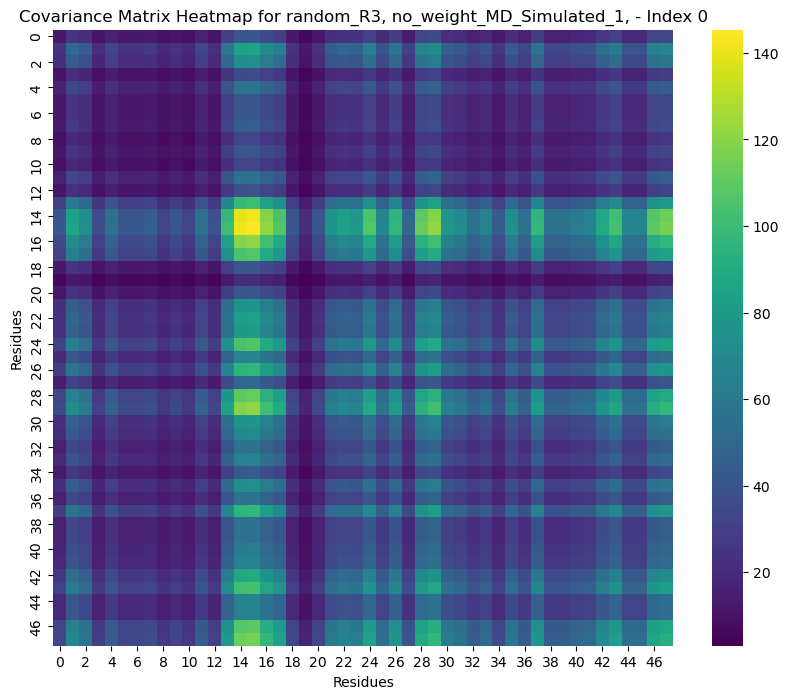

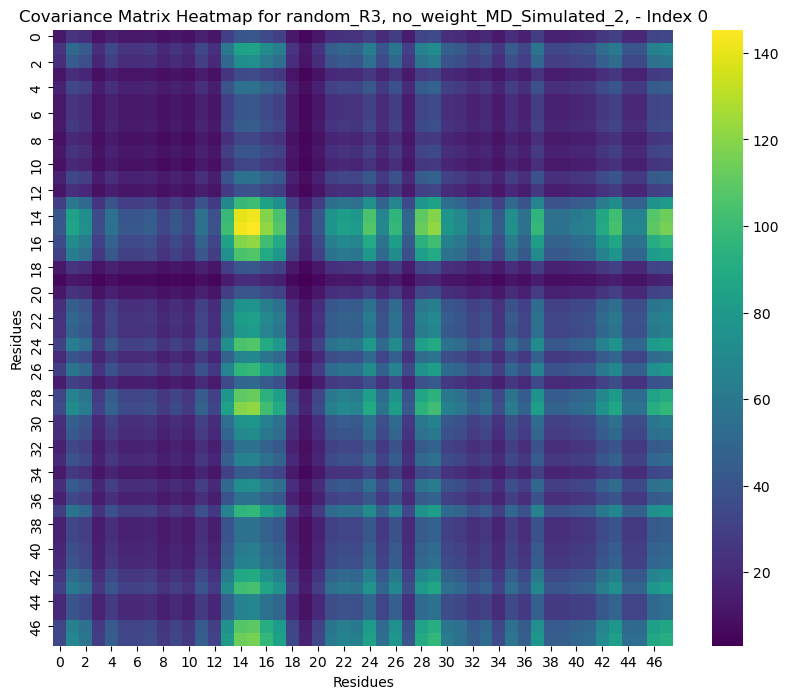

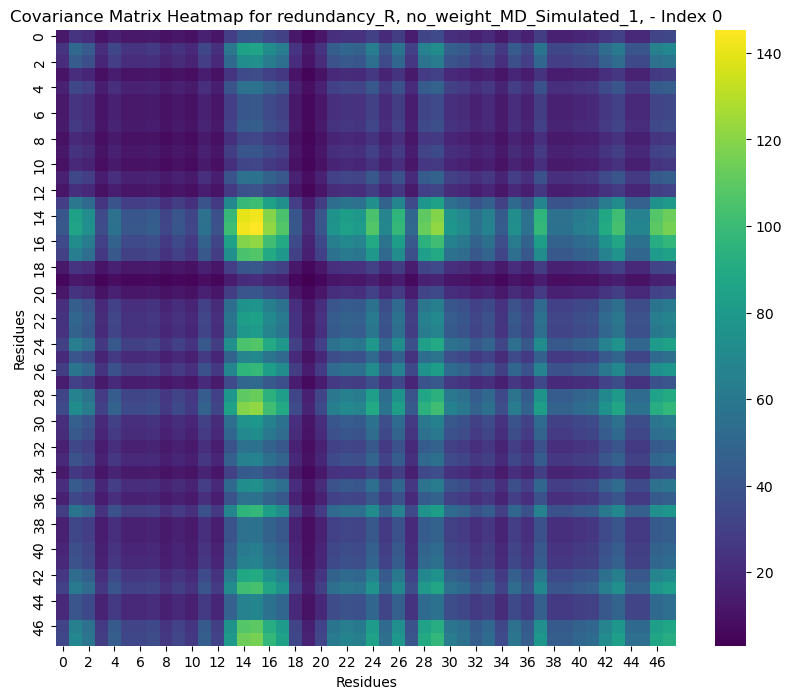

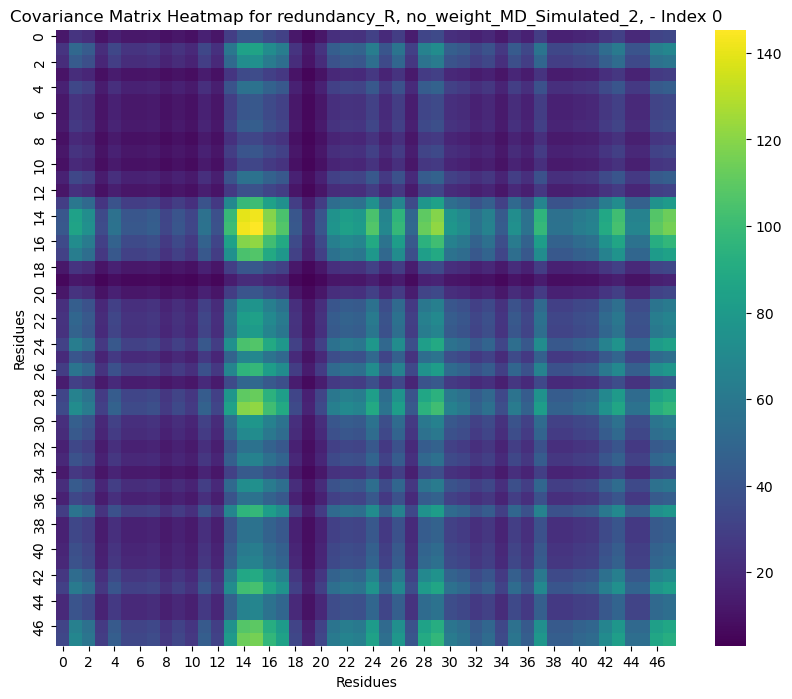

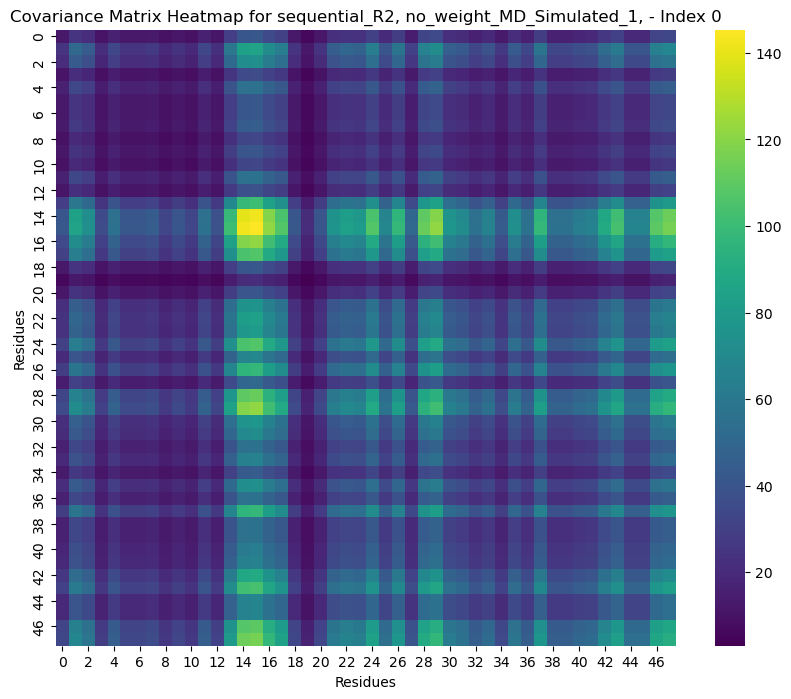

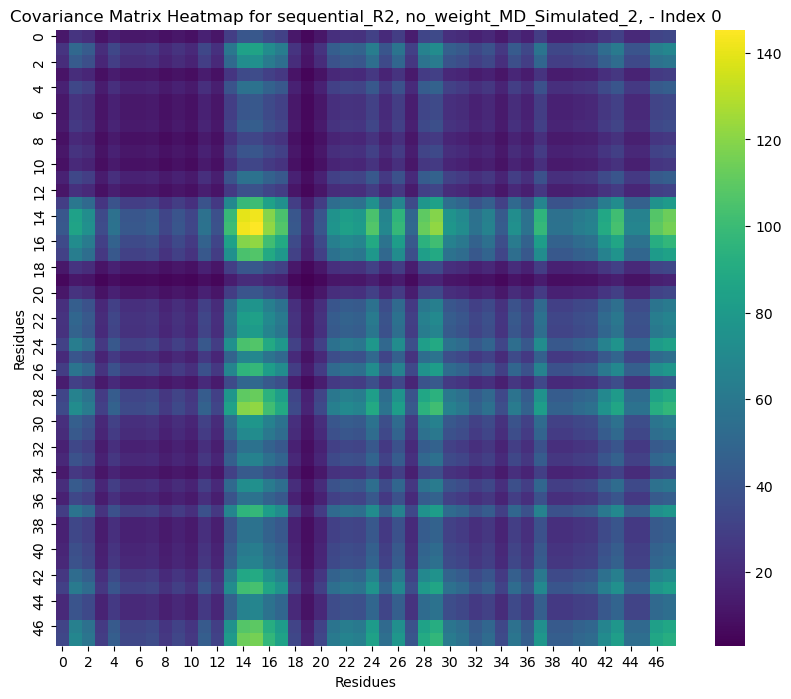

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'cross_corr_matrices' is a DataFrame with a 'cov_matrix' column containing covariance matrices,
# and 'name' column to identify each matrix.

# Since direct access like 'cross_corr_matrices['cov_matrix'].values' was shown,
# let's iterate over these matrices and plot them.

# This code assumes each row in 'cross_corr_matrices' represents a different combination of 'name' and 'calc_name',
# with a unique covariance matrix in 'cov_matrix'.

# Plotting heatmaps for each covariance matrix
# select calc_names which contain no_weight or test

full_matrices = cross_corr_matrices.loc[cross_corr_matrices['calc_name'].str.contains(('no_weight' or 'test'))]

for index, row in full_matrices.iterrows():
    plt.figure(figsize=(10, 8))
    sns.heatmap(row['cov_matrix'], annot=False, cmap='viridis')
    plt.title(f"Covariance Matrix Heatmap for {row['name']}, {row['calc_name']}, - Index {index}")
    plt.xlabel("Residues")
    plt.ylabel("Residues")
    plt.show()

